<a href="https://colab.research.google.com/github/tarun422/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Mobile Price Range Prediction

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name** - Tarun

# **Problem Statement**

## ***In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.***

### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of 

# **GitHub Link -**

# **Project Summary -**

# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [102]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings will not shows any warning while we make changes in datafram

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [103]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# Read the file using pandas Read_csv function

df=pd.read_csv('/content/drive/MyDrive/cap 3/data_mobile_price_range.csv')

### Dataset First View

In [105]:
# take the dataset view using pandas head function

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [106]:
# looks all over the data using transpose function

df.head(5).T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


### lets check the shape 

In [107]:
# check the shape of the dataset

shapes=df.shape
print("Row is",shapes[0])
print("Column is",shapes[1])

Row is 2000
Column is 21


### check null values

In [108]:
# null values using isnull function

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### dataset information

In [109]:
# overlook to data information using info function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### check the Columns

In [110]:
# columns of the dataset

df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [111]:
list_of_columns=['battery_power','blue','dual_sim','fc','four_g','int_memory',
                'mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h',
                 'sc_w','talk_time', 'three_g','touch_screen','wifi','price_range']

### change datatype into int16

In [112]:
# change type of the column using astype

for i in list_of_columns:
 df[i]=df[i].astype('int16')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int16  
 1   blue           2000 non-null   int16  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int16  
 4   fc             2000 non-null   int16  
 5   four_g         2000 non-null   int16  
 6   int_memory     2000 non-null   int16  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int16  
 9   n_cores        2000 non-null   int16  
 10  pc             2000 non-null   int16  
 11  px_height      2000 non-null   int16  
 12  px_width       2000 non-null   int16  
 13  ram            2000 non-null   int16  
 14  sc_h           2000 non-null   int16  
 15  sc_w           2000 non-null   int16  
 16  talk_time      2000 non-null   int16  
 17  three_g        2000 non-null   int16  
 18  touch_sc

In [114]:
df.head(5).T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


### check duplicate values

In [115]:
# duplicate using duplicated function

df.duplicated().sum()

0

## ***Understanding variable***

### rename few columns 

In [116]:
# rename few columns

df.rename(columns={'battery_power':'mah',
                   'fc':'Front_cam',
                   'pc':'Primary_cam'},inplace=True)

### check number of unique values

In [117]:
# using nunique function

df.nunique()

mah             1094
blue               2
clock_speed       26
dual_sim           2
Front_cam         20
four_g             2
int_memory        63
m_dep             10
mobile_wt        121
n_cores            8
Primary_cam       21
px_height       1137
px_width        1109
ram             1562
sc_h              15
sc_w              19
talk_time         19
three_g            2
touch_screen       2
wifi               2
price_range        4
dtype: int64

## ***Statistical overview of variable***

In [118]:
# using describe function

df.describe().T

,count,mean,std,min,25%,50%,75%,max
mah,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
Front_cam,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0




1.   2000 counts for all columns
2.   mah distribution looks alright
3.   bluetooth contain two values alright no problem (contain 0 which is posible)
4.   clockspeed distribution also looks normal
5.   dual sim contain two values alright no problem (contain 0 which is posible)
6.   front cam contain diffrent range of values (contain 0 which is posible)
7.   four_g contain two values alright no problem (contain 0 which is posible)
8.   internel memory distribution also normal
9.   maximum depth distribution also looks normal
10.  mobile weight distribution also looks normal
11.  number of cores distribution also looks normal
12.  primary camera distribution also looks normal (contain 0 which is posible)
13. ***pixel resolution height (contain 0 which is not posible)***
14. pixel resolution width distribution looks normal
15. ram is also looks normal
16. screen height is also looks normal
17. ***screen weidth (contain 0 which is not posible)***
18. talk time also looks normal 
19. three g  contain two values(contain 0 which is posible)
20. touch screen contain two values (contain 0 which is posible)
21. wifi contain two values (contain 0 which is posible)
22. prige range distribution looks normal

### Handlind inappropriate values

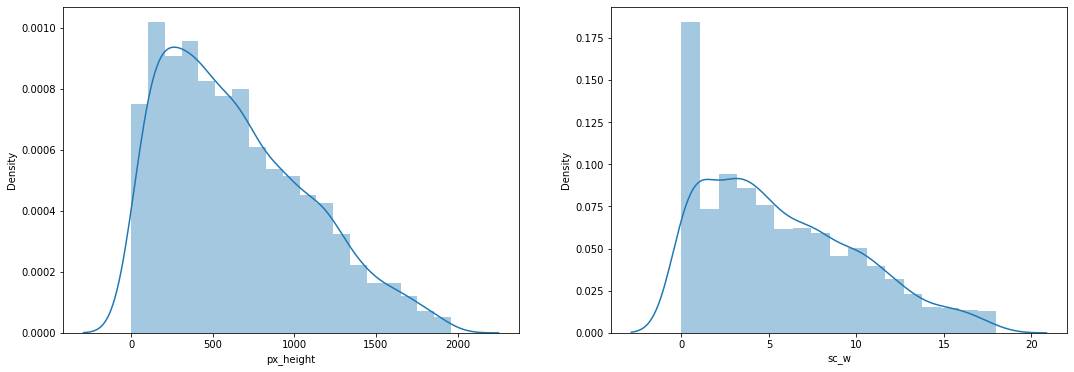

In [119]:
# check the distribution of the pixel resolution height and screen weidth

fig = plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
sns.distplot(df['px_height'])
plt.subplot(1,2,2)
sns.distplot(df['sc_w'])

#### handling pixel height column

In [120]:
# check how many obervation are present with pixel height 0

df[df['px_height']==0]

,mah,blue,clock_speed,dual_sim,Front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [121]:
# few observations are present so drop these observation using index method

df.drop(index=[1481,1933],inplace=True)

#### handling screen weidth column

In [122]:
# checking values of screen weidth having 0

df[df['sc_w']==0].shape[0]

179

* 179 are a big number so it is important to fill these values

* KNN (K-Nearest Neighbour) is the best imputer algo to fill these values

In [123]:
# replace zero eith nan values

df['sc_w']=df['sc_w'].replace(0,np.nan)

In [124]:
# import KKN imputer and impute the values with i nwighbours

from sklearn.impute import KNNImputer
knnimputer=KNNImputer(n_neighbors=1)
df=pd.DataFrame(knnimputer.fit_transform(df),columns=df.columns)

In [125]:
# check the data type 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mah           1998 non-null   float64
 1   blue          1998 non-null   float64
 2   clock_speed   1998 non-null   float64
 3   dual_sim      1998 non-null   float64
 4   Front_cam     1998 non-null   float64
 5   four_g        1998 non-null   float64
 6   int_memory    1998 non-null   float64
 7   m_dep         1998 non-null   float64
 8   mobile_wt     1998 non-null   float64
 9   n_cores       1998 non-null   float64
 10  Primary_cam   1998 non-null   float64
 11  px_height     1998 non-null   float64
 12  px_width      1998 non-null   float64
 13  ram           1998 non-null   float64
 14  sc_h          1998 non-null   float64
 15  sc_w          1998 non-null   float64
 16  talk_time     1998 non-null   float64
 17  three_g       1998 non-null   float64
 18  touch_screen  1998 non-null 

In [126]:
# make  a list of columns in which we convert datatype

list_of_columnss=['mah', 'blue', 'dual_sim', 'Front_cam', 'four_g',
       'int_memory', 'mobile_wt', 'n_cores', 'Primary_cam',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

In [127]:
# covert the data type to int16

for i in list_of_columnss:
 df[i]=df[i].astype('int16')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mah           1998 non-null   int16  
 1   blue          1998 non-null   int16  
 2   clock_speed   1998 non-null   float64
 3   dual_sim      1998 non-null   int16  
 4   Front_cam     1998 non-null   int16  
 5   four_g        1998 non-null   int16  
 6   int_memory    1998 non-null   int16  
 7   m_dep         1998 non-null   float64
 8   mobile_wt     1998 non-null   int16  
 9   n_cores       1998 non-null   int16  
 10  Primary_cam   1998 non-null   int16  
 11  px_height     1998 non-null   int16  
 12  px_width      1998 non-null   int16  
 13  ram           1998 non-null   int16  
 14  sc_h          1998 non-null   int16  
 15  sc_w          1998 non-null   int16  
 16  talk_time     1998 non-null   int16  
 17  three_g       1998 non-null   int16  
 18  touch_screen  1998 non-null 

### check the distribution of variables

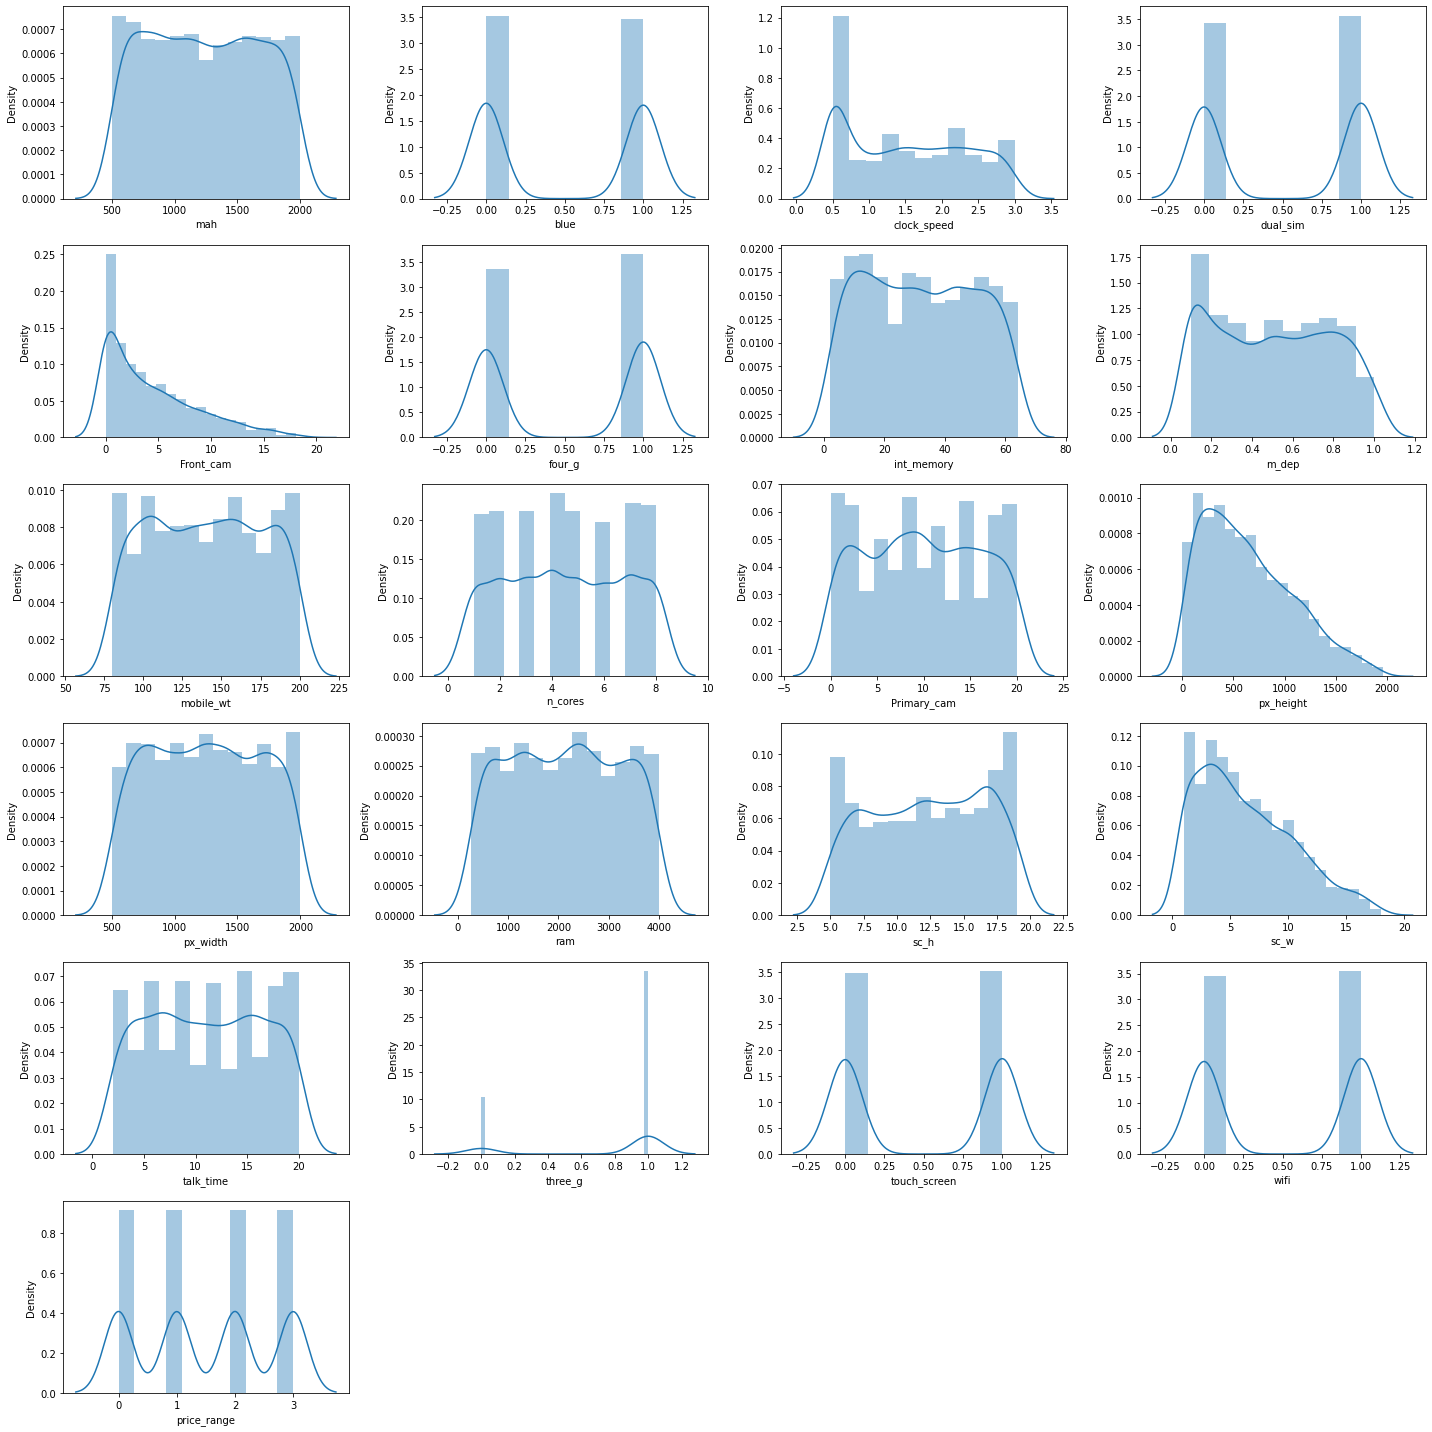

In [129]:
# check the distribution 

fig = plt.figure(figsize=(20,20))
count=1
for i in df.columns:
  plt.subplot(6,4,count)
  sns.distplot(df[i])
  count+=1
  plt.tight_layout()

* All are not normaly distribted so normalization is required

## ***Chacking class imbalance***

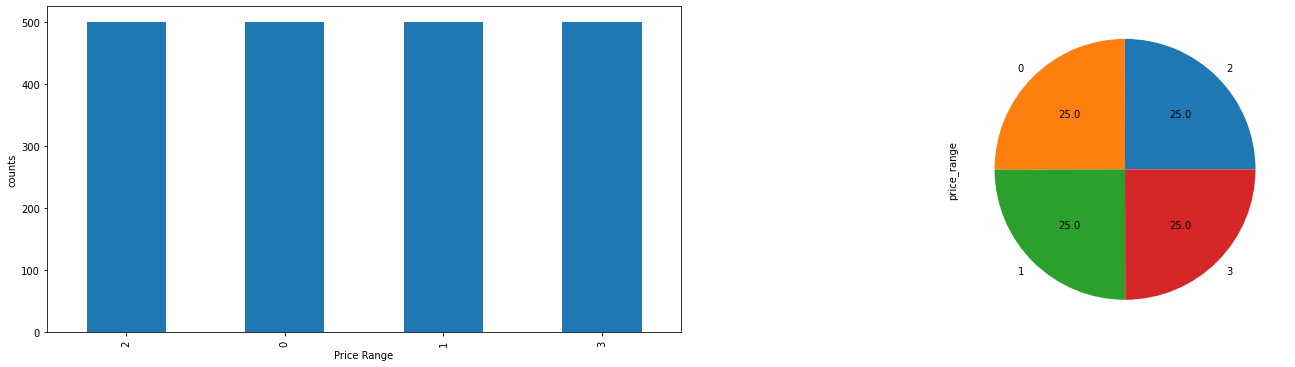

In [130]:
# checking the values of the target variable

plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
df['price_range'].value_counts().plot(kind='bar')
plt.xlabel("Price Range")
plt.ylabel("counts")
plt.subplot(1,2,2)
df['price_range'].value_counts().plot(kind='pie',autopct='%.1f')

* all values looks similar 

### check unique values

In [131]:
# checking unique values using nunique function

df.nunique()

mah             1093
blue               2
clock_speed       26
dual_sim           2
Front_cam         20
four_g             2
int_memory        63
m_dep             10
mobile_wt        121
n_cores            8
Primary_cam       21
px_height       1136
px_width        1109
ram             1561
sc_h              15
sc_w              18
talk_time         19
three_g            2
touch_screen       2
wifi               2
price_range        4
dtype: int64

* create numarical and categorical columns using above nunique function

In [132]:
# create numarical columns

numarical_columns=['mah', 'clock_speed', 'Front_cam', 'int_memory', 'm_dep', 'mobile_wt', 'Primary_cam','px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time','price_range']

In [133]:
# create numarical columns

categorical_columns=['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g','touch_screen', 'wifi', 'price_range']

## ***Outlier Detection***

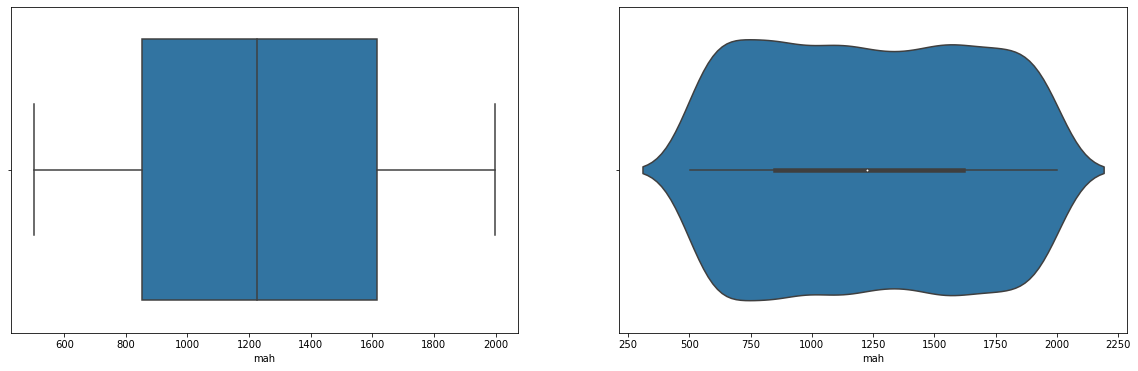

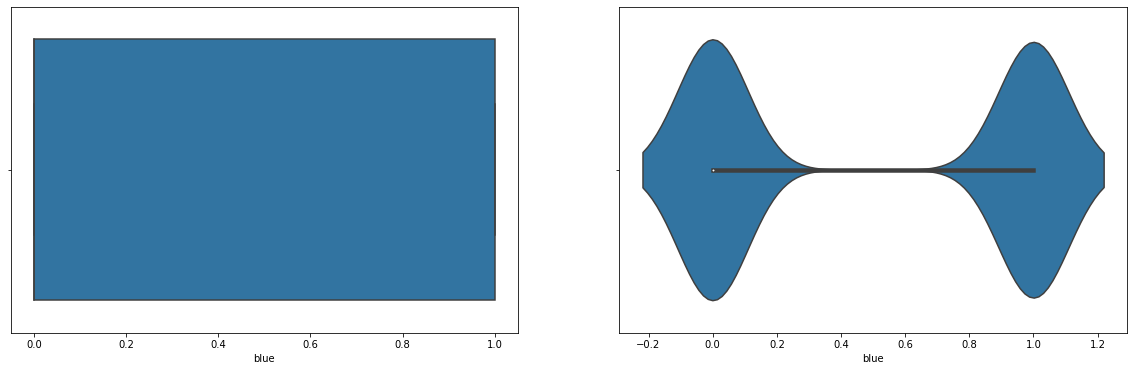

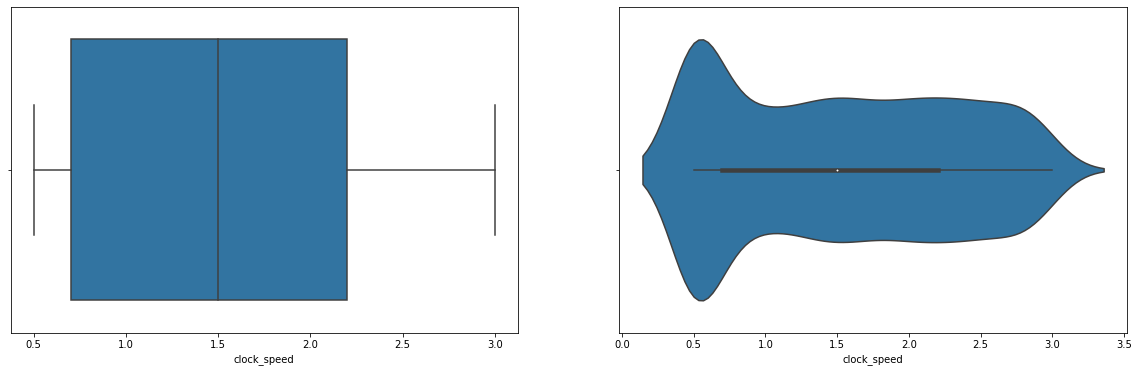

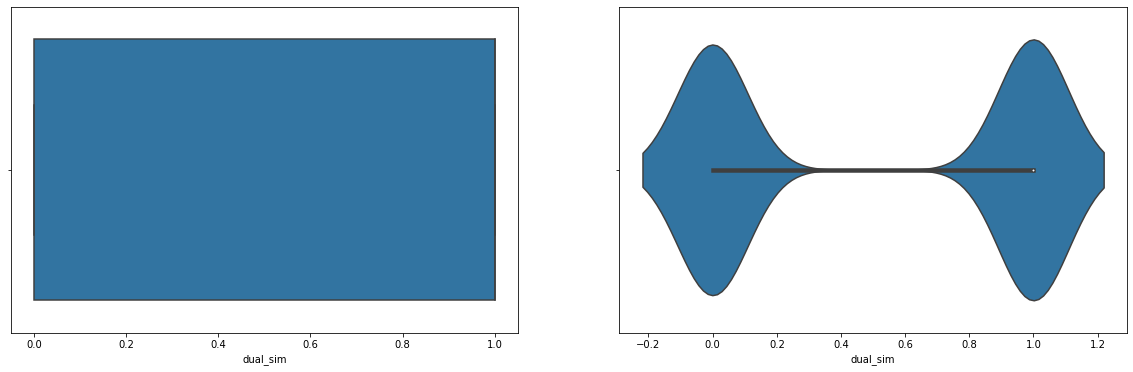

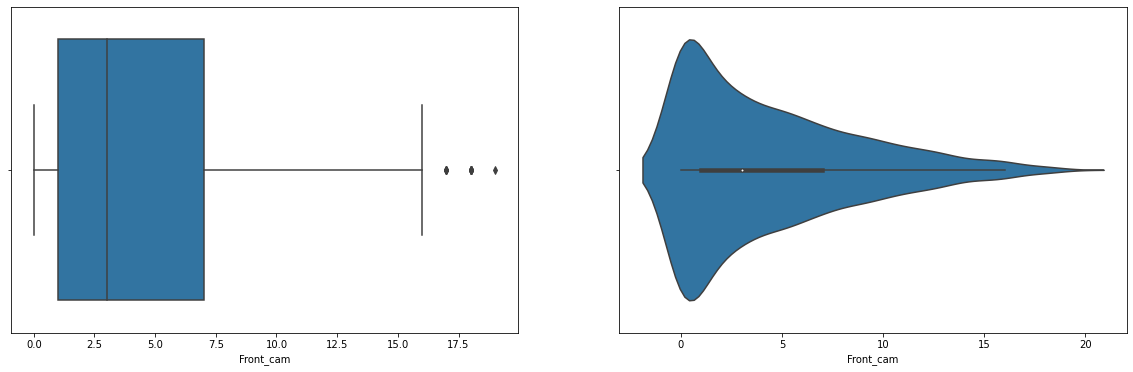

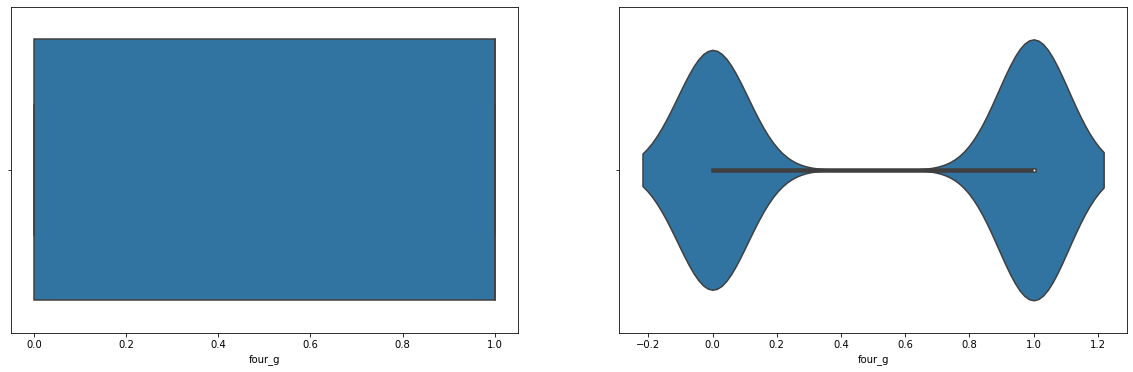

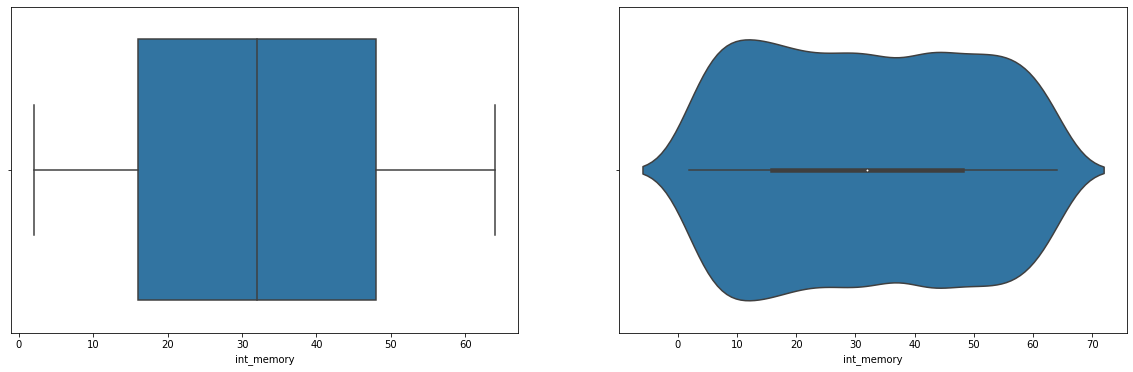

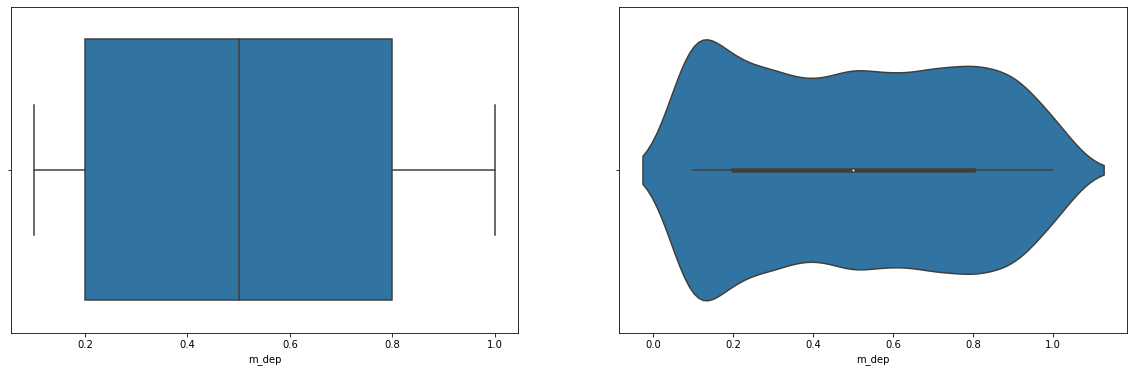

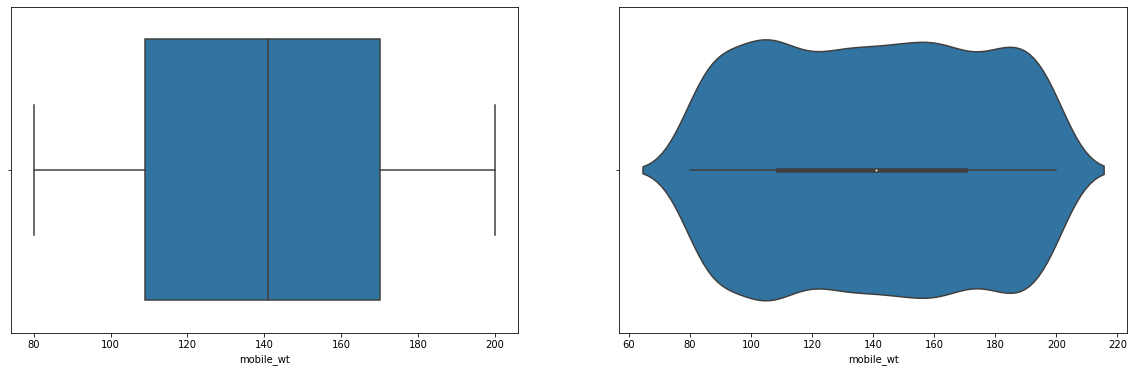

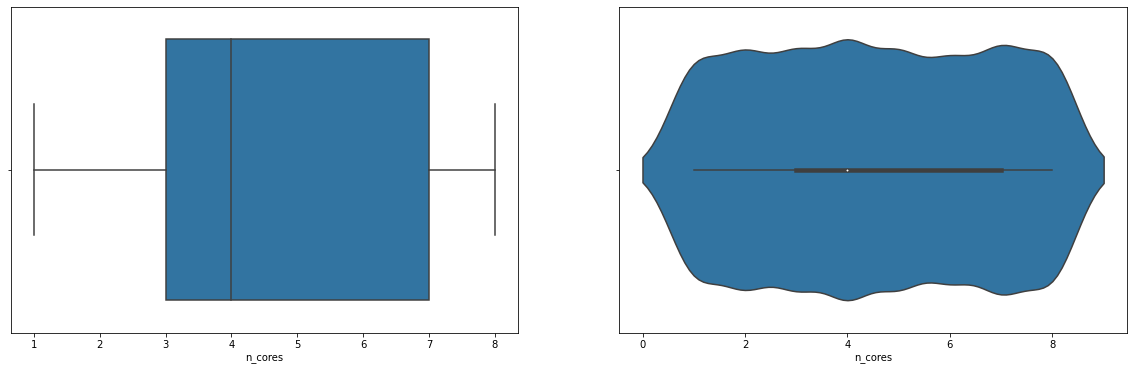

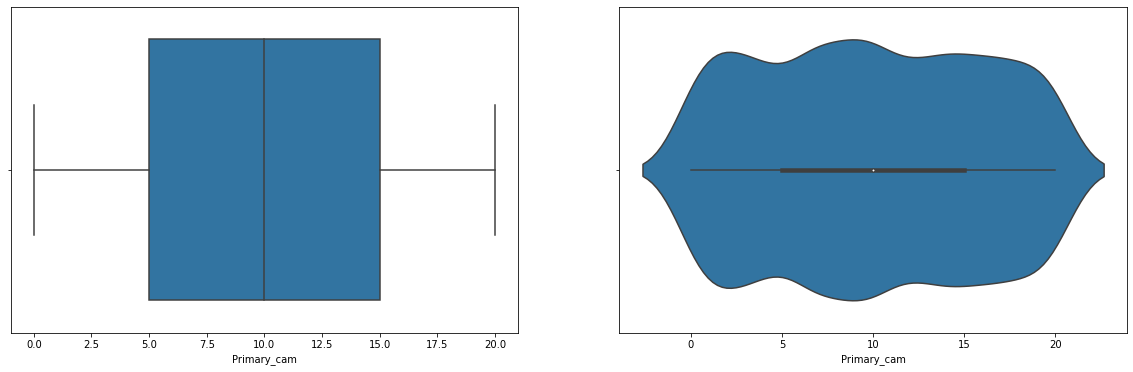

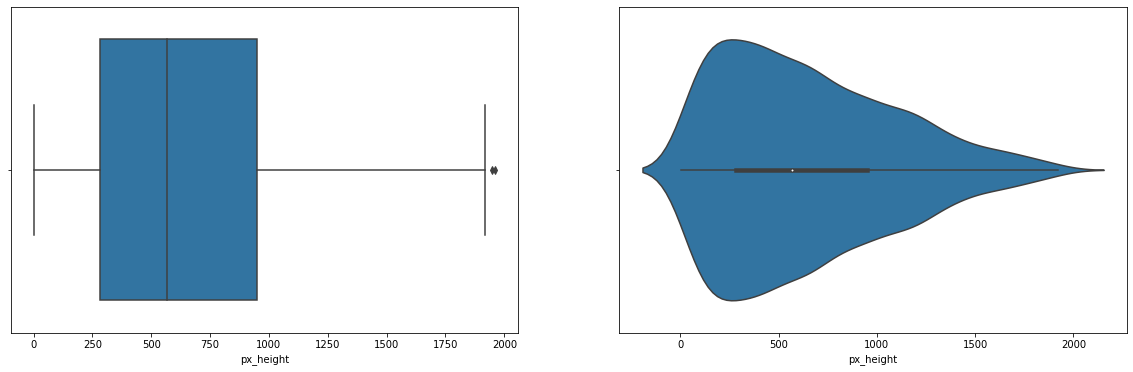

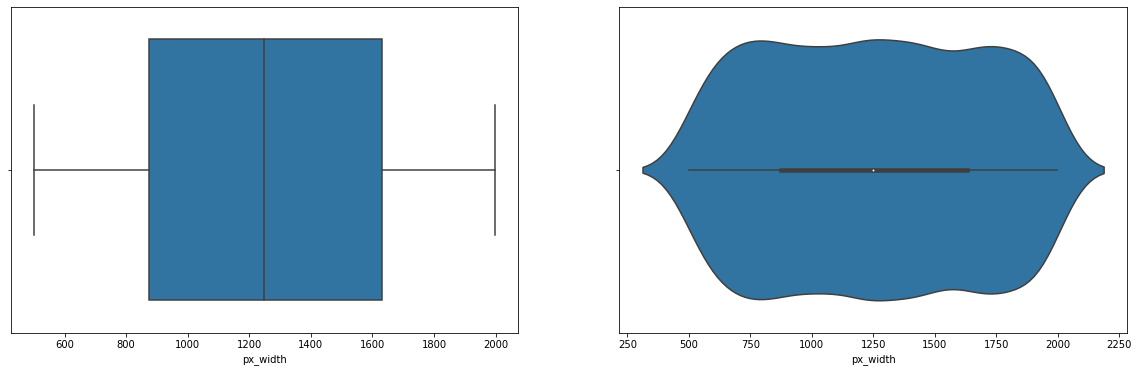

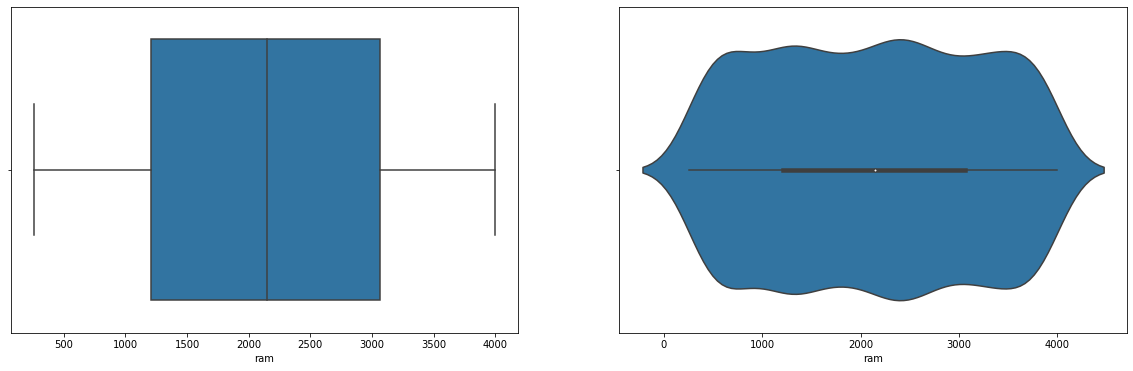

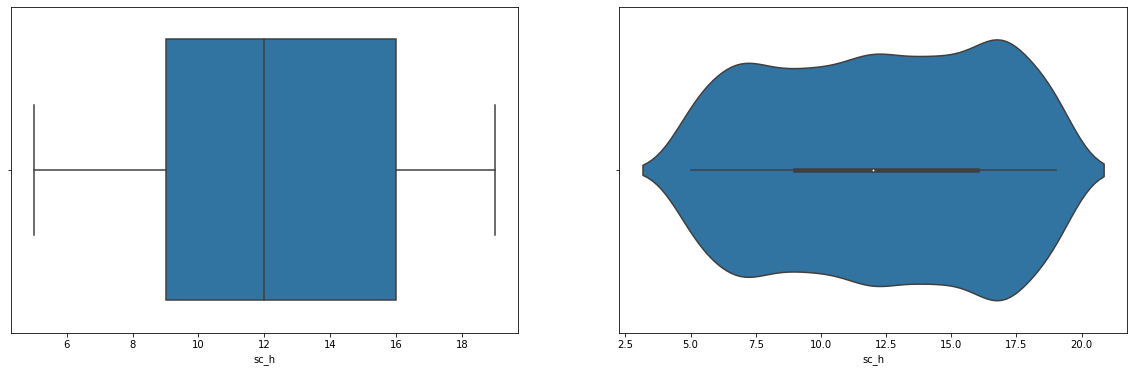

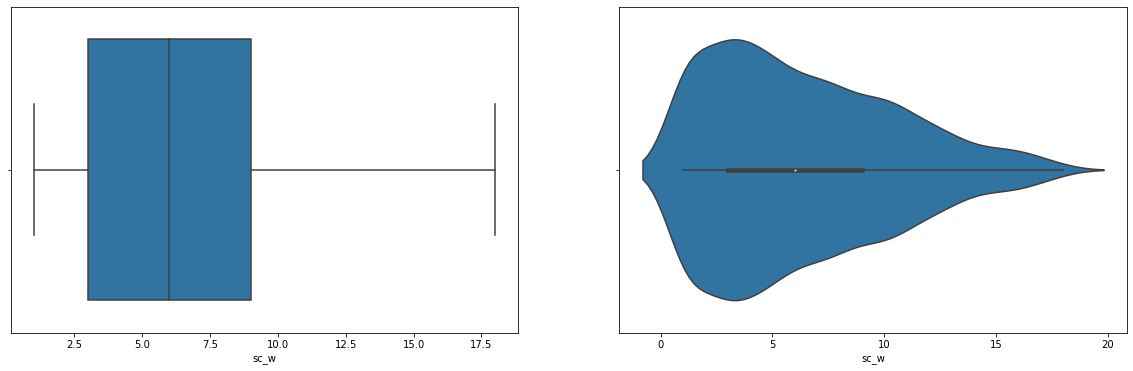

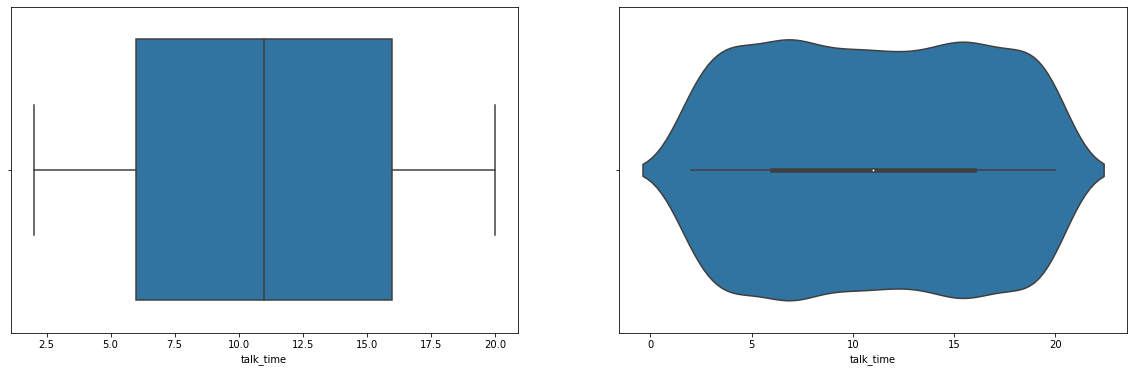

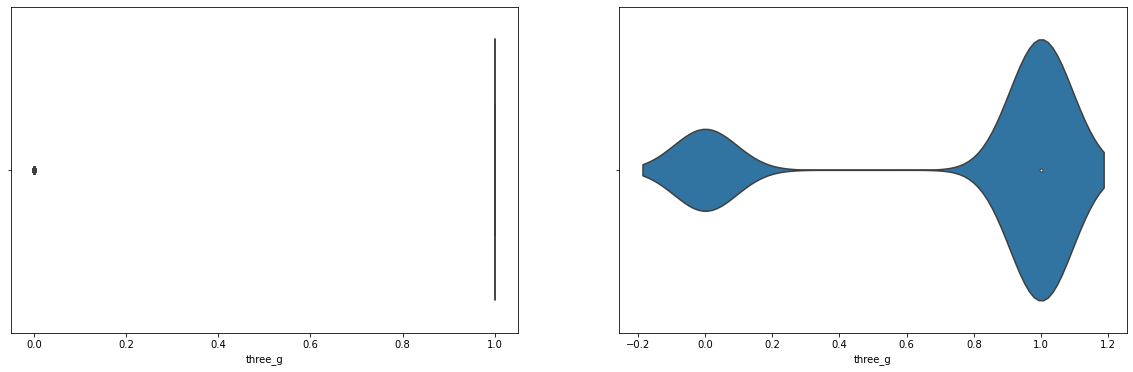

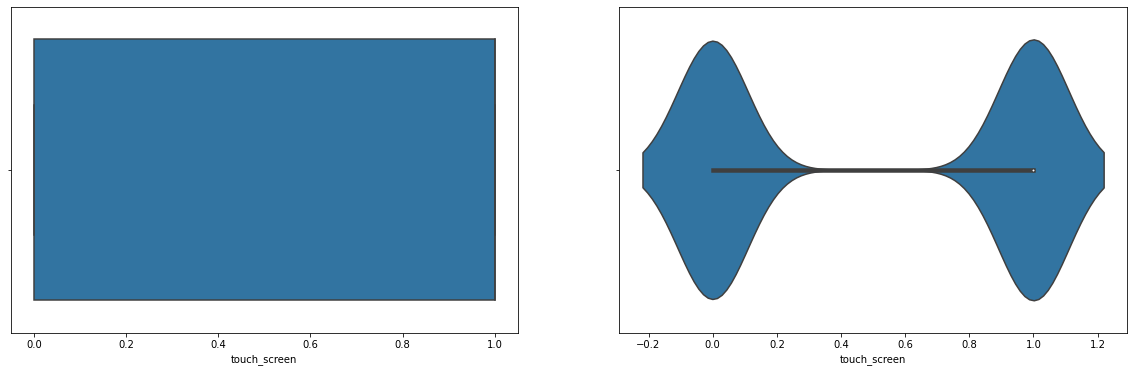

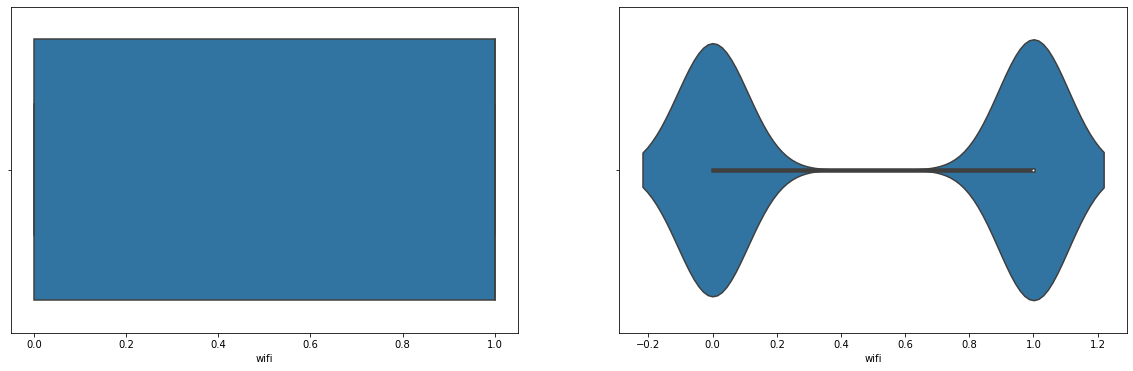

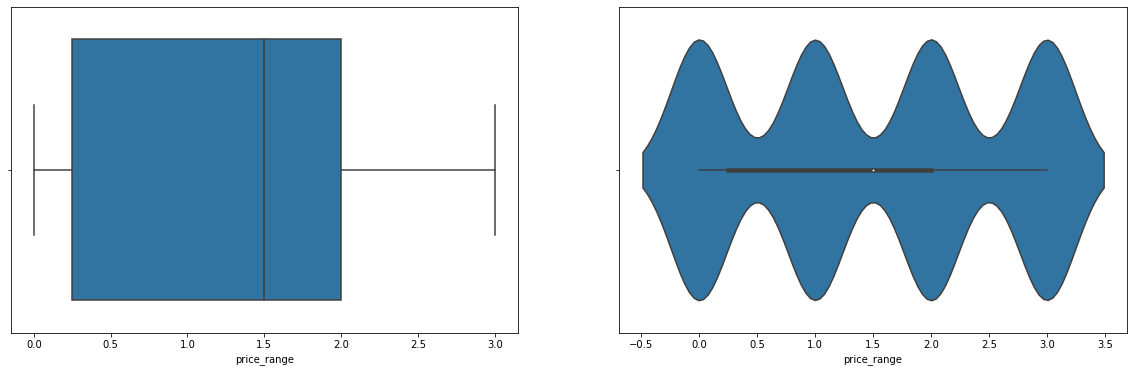

In [134]:
# check outliers

for i in df.columns:
  fig = plt.figure(figsize=(20, 6))
  plt.subplot(1,2,1)
  sns.boxplot(df[i])
  plt.subplot(1,2,2)
  sns.violinplot(df[i])
  plt.show()

* From the above graph we see three g column contain outlier
* Front camera have some outliers
* pixel height has some outliers

### outlier treatments

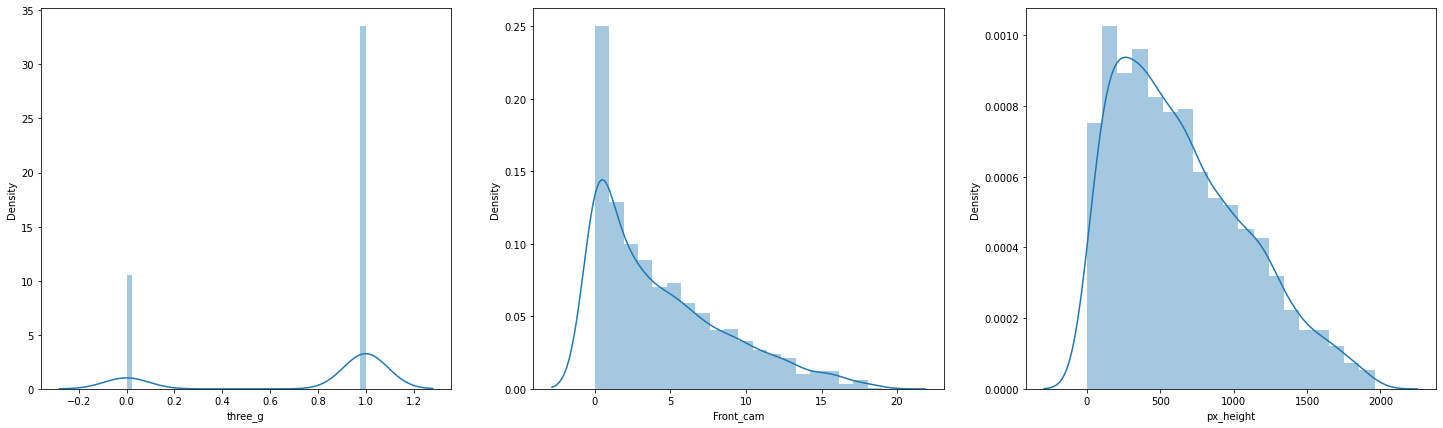

In [135]:
# check the distribution of all the outlier colums again

plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
sns.distplot(df['three_g'])
plt.subplot(1,3,2)
sns.distplot(df['Front_cam'])
plt.subplot(1,3,3)
sns.distplot(df['px_height'])

* As we see threeg have outlier but it is not consider as outlier because it is a feature 

* **Outlier treatment if**
1. Z-score :- if values are normaly distributed
2. Persentile :- if values are skewed

#### Front_cam outlier removal

In [136]:
# 25% percentile of front camera column

p25=df['Front_cam'].quantile(0.25)

# 75% percentile of front camera column

p75=df['Front_cam'].quantile(0.75)

In [137]:
print(p25,p75)

1.0 7.0


In [138]:
# Interquartile range 

iqr=p75-p25
iqr

6.0

In [139]:
# upper limit

upper_limit=p75+1.5*iqr
print(upper_limit)

# lower limit

lower_limit=p25-1.5*iqr
print(lower_limit)

16.0
-8.0


In [140]:
# check the outlier values

df[df['Front_cam']>upper_limit].count()

mah             18
blue            18
clock_speed     18
dual_sim        18
Front_cam       18
four_g          18
int_memory      18
m_dep           18
mobile_wt       18
n_cores         18
Primary_cam     18
px_height       18
px_width        18
ram             18
sc_h            18
sc_w            18
talk_time       18
three_g         18
touch_screen    18
wifi            18
price_range     18
dtype: int64

* 18 observations are present so drop them 

In [141]:
# contain only non outliers value

df=df[df['Front_cam']<upper_limit]

#### Pixel height outlier removal

In [142]:
# 25% percentile of pixel height column

p25=df['px_height'].quantile(0.25)

# 75% percentile of pixel height column

p75=df['px_height'].quantile(0.75)

In [143]:
# Interquartile range

iqr=p75-p25
iqr

661.5

In [144]:
# Upper limit

upper_limit=p75+1.5*iqr

# lower limit

lower_limit=p25-1.5*iqr

In [145]:
# check the outliers value

df[df['px_height']>upper_limit].count()

mah             2
blue            2
clock_speed     2
dual_sim        2
Front_cam       2
four_g          2
int_memory      2
m_dep           2
mobile_wt       2
n_cores         2
Primary_cam     2
px_height       2
px_width        2
ram             2
sc_h            2
sc_w            2
talk_time       2
three_g         2
touch_screen    2
wifi            2
price_range     2
dtype: int64

* Only 2 observation are presen so drop them

In [146]:
# contain only non outliers value

df=df[df['px_height']<upper_limit]

##### Recheck the outliers

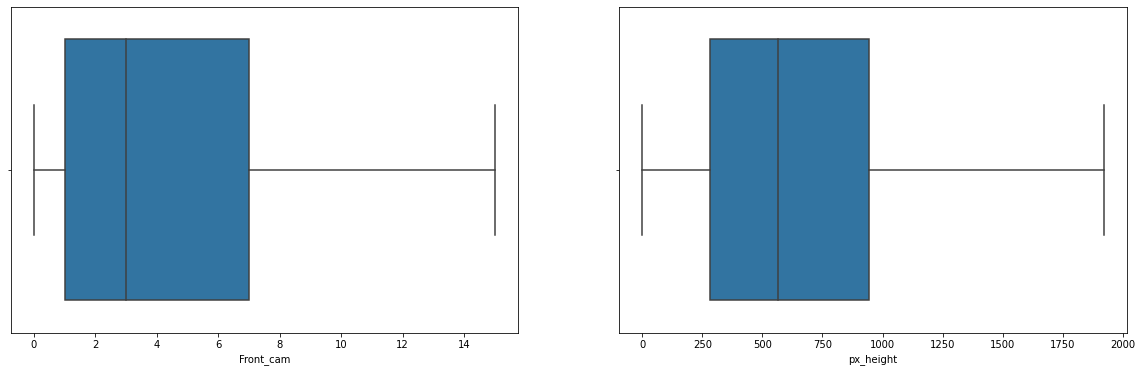

In [147]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.boxplot(df['Front_cam'])
plt.subplot(1,2,2)
sns.boxplot(df['px_height'])

# ***EDA***

## ***Univariate Analysis***

### Univariate analysis on categorical columns

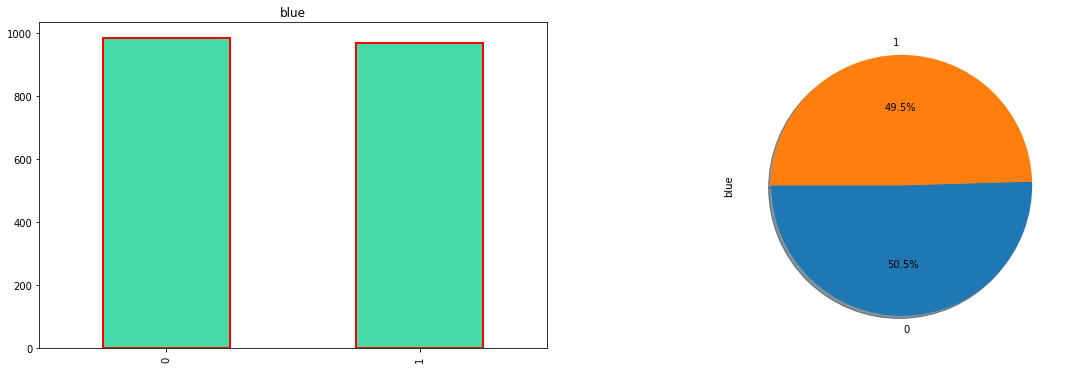

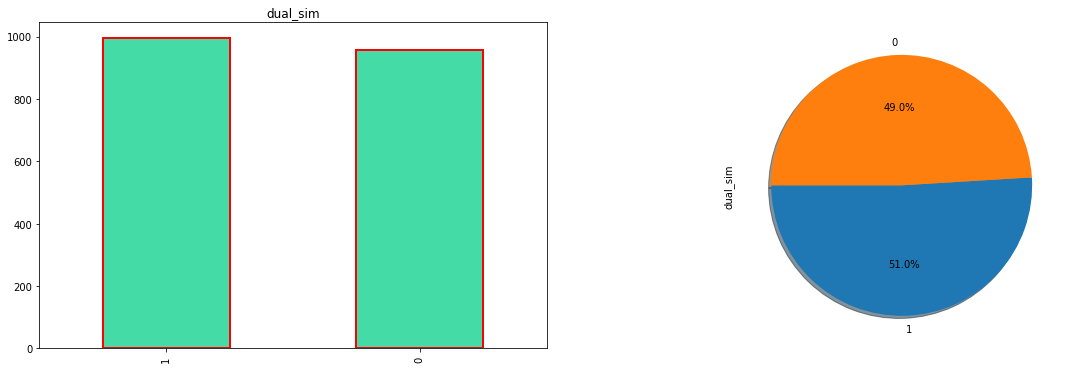

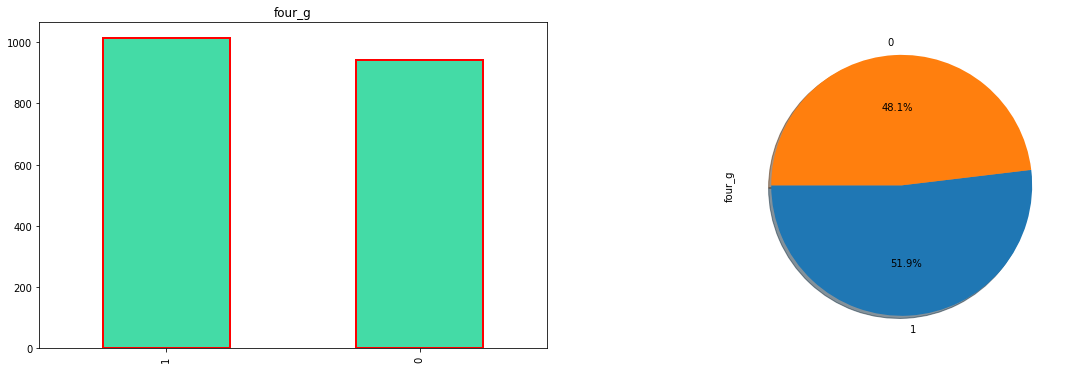

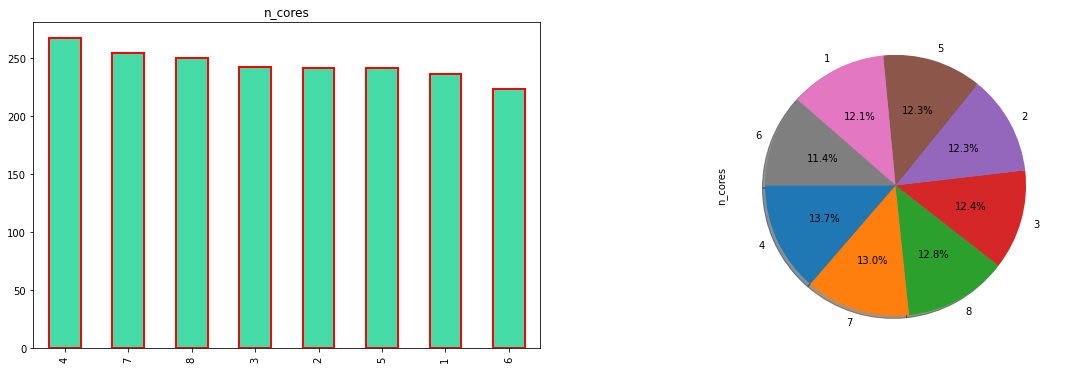

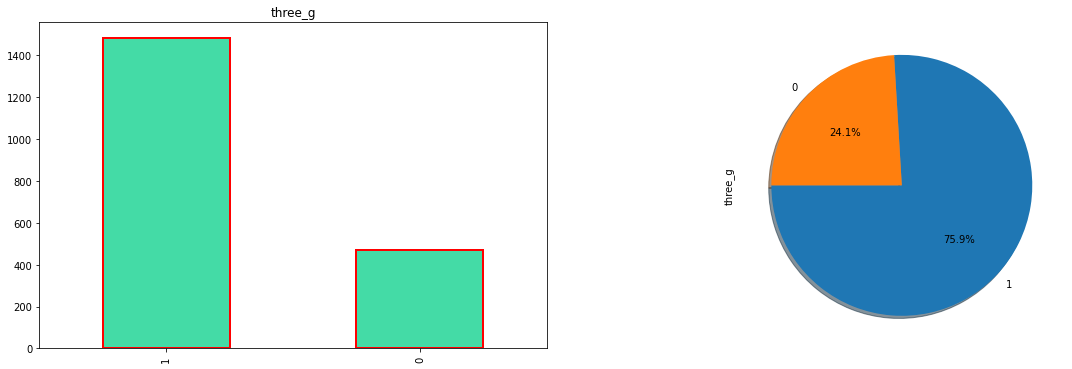

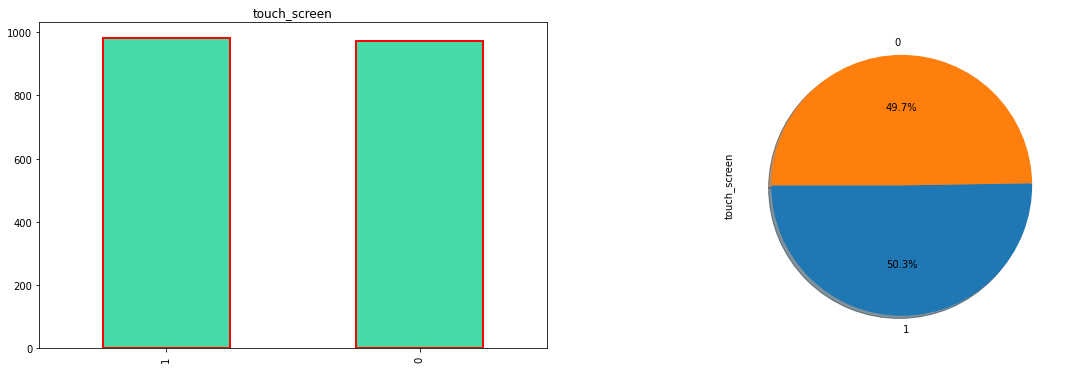

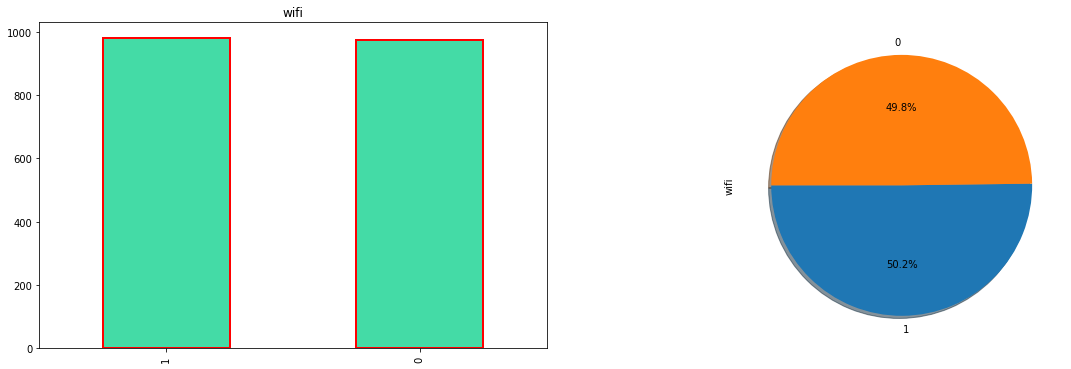

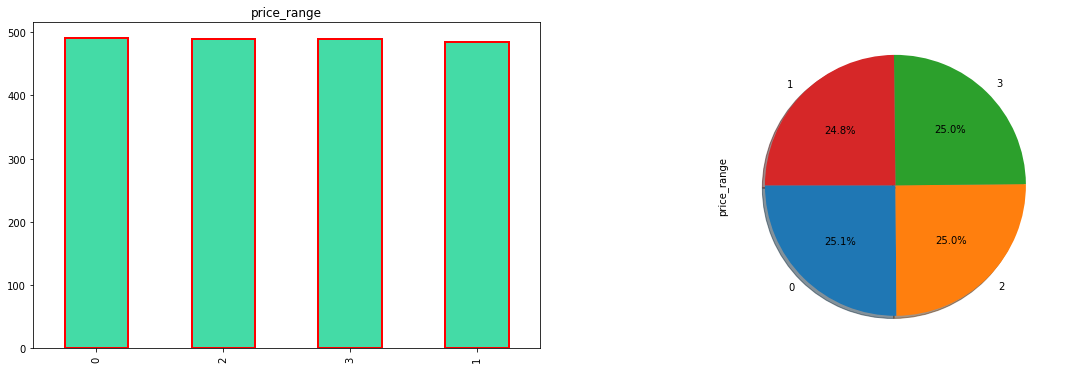

In [148]:
for i in categorical_columns:
 fig = plt.figure(figsize=(20, 6))
 plt.subplot(1,2,1)
 df[i].value_counts().plot(kind='bar',color='#44dba6',edgecolor='red',linewidth=2)
 plt.title(i)
 plt.subplot(1,2,2)
 df[i].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,startangle=180)
 plt.show()

### univariate analysis on numarical columns

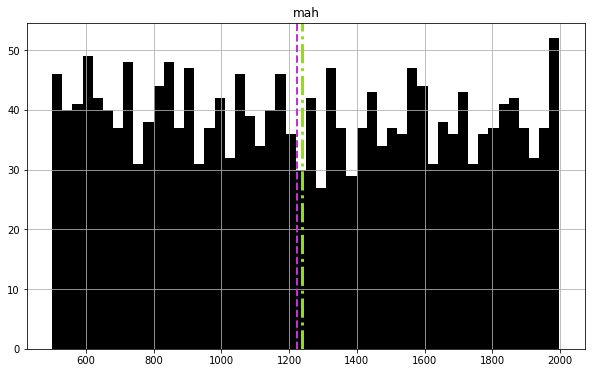

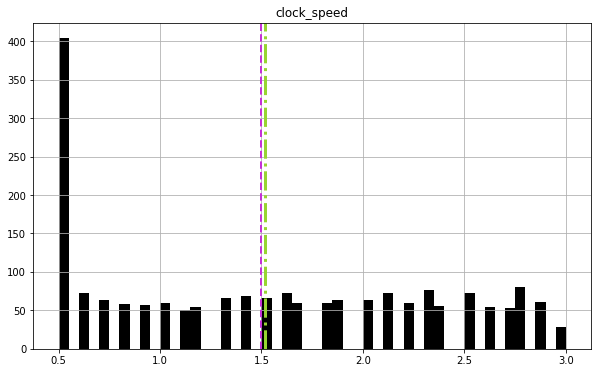

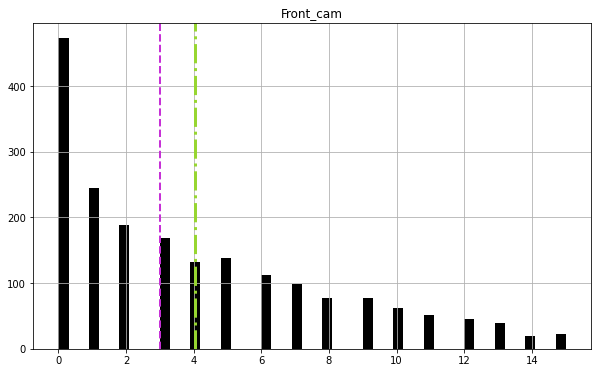

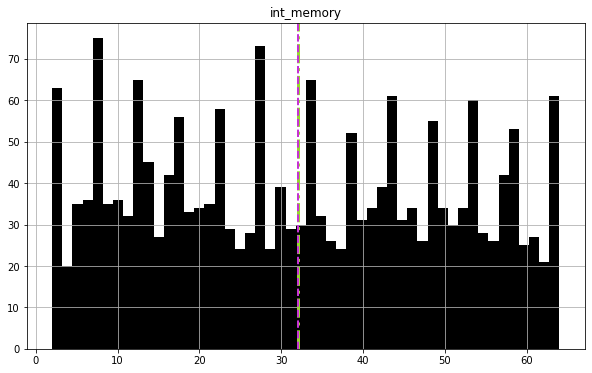

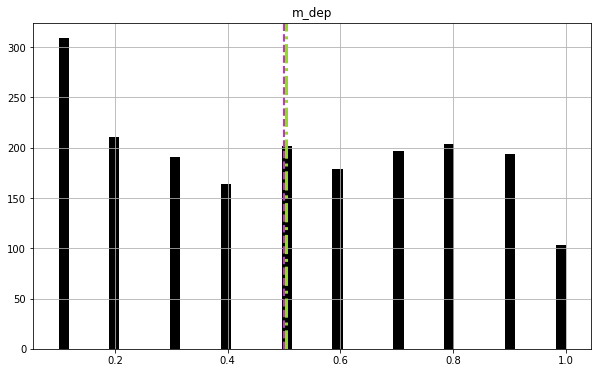

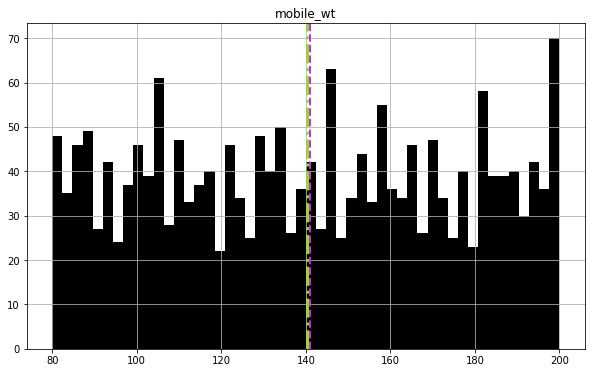

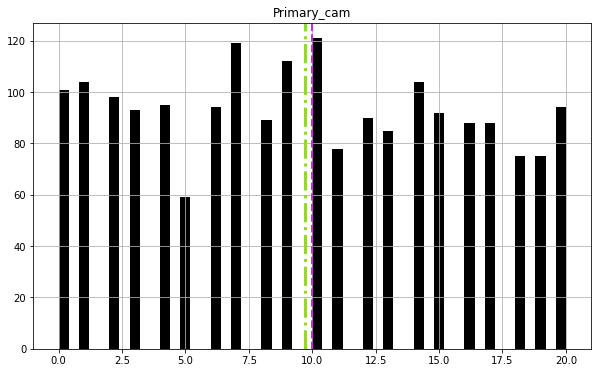

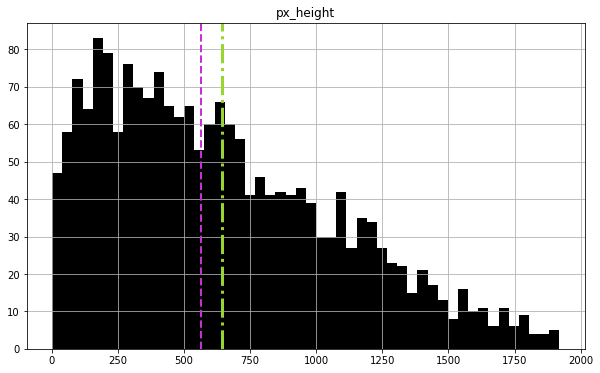

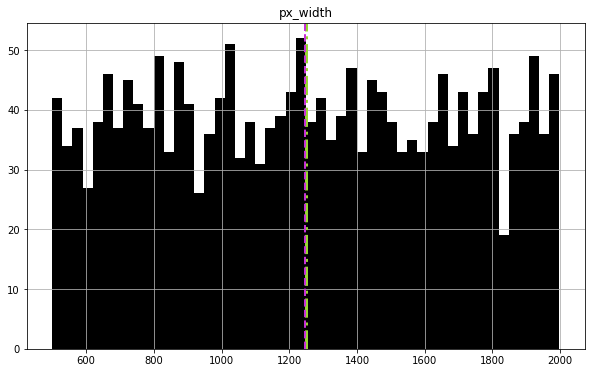

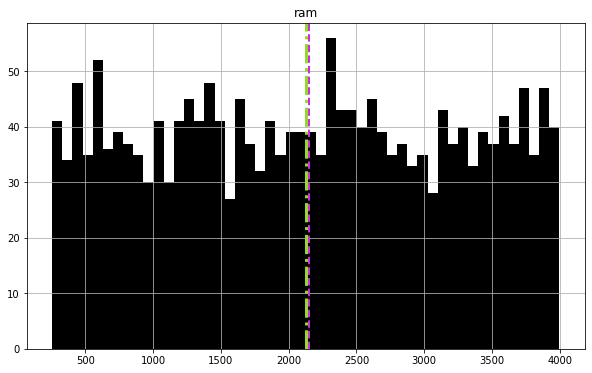

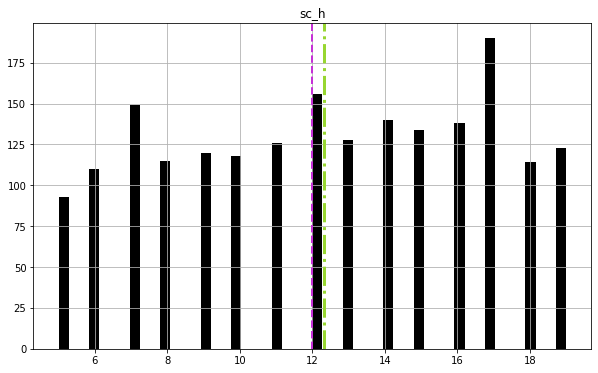

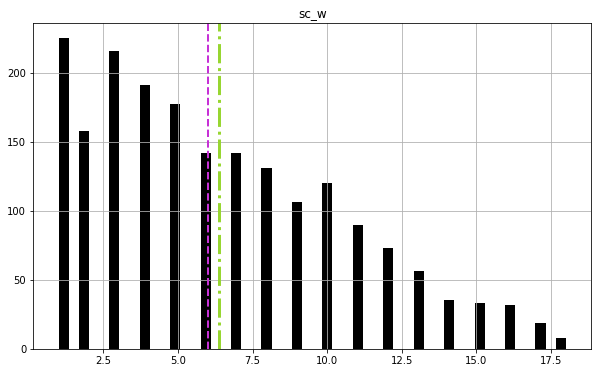

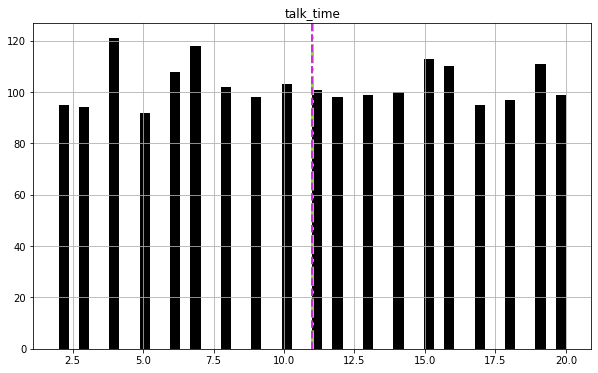

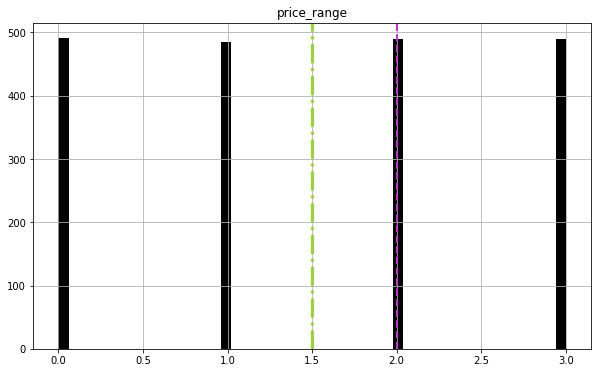

In [149]:
for i in numarical_columns:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = df[i]
    feature.hist(bins=50, ax = ax,color='black')
    ax.axvline(feature.mean(), color='#97d631', linestyle='dashdot', linewidth=3)
    ax.axvline(feature.median(), color='#c631d6', linestyle='dashed', linewidth=2)    
    ax.set_title(i)
plt.show()

## ***Bivariate analysis***

### Bivariate analysis with target column (Prige range)

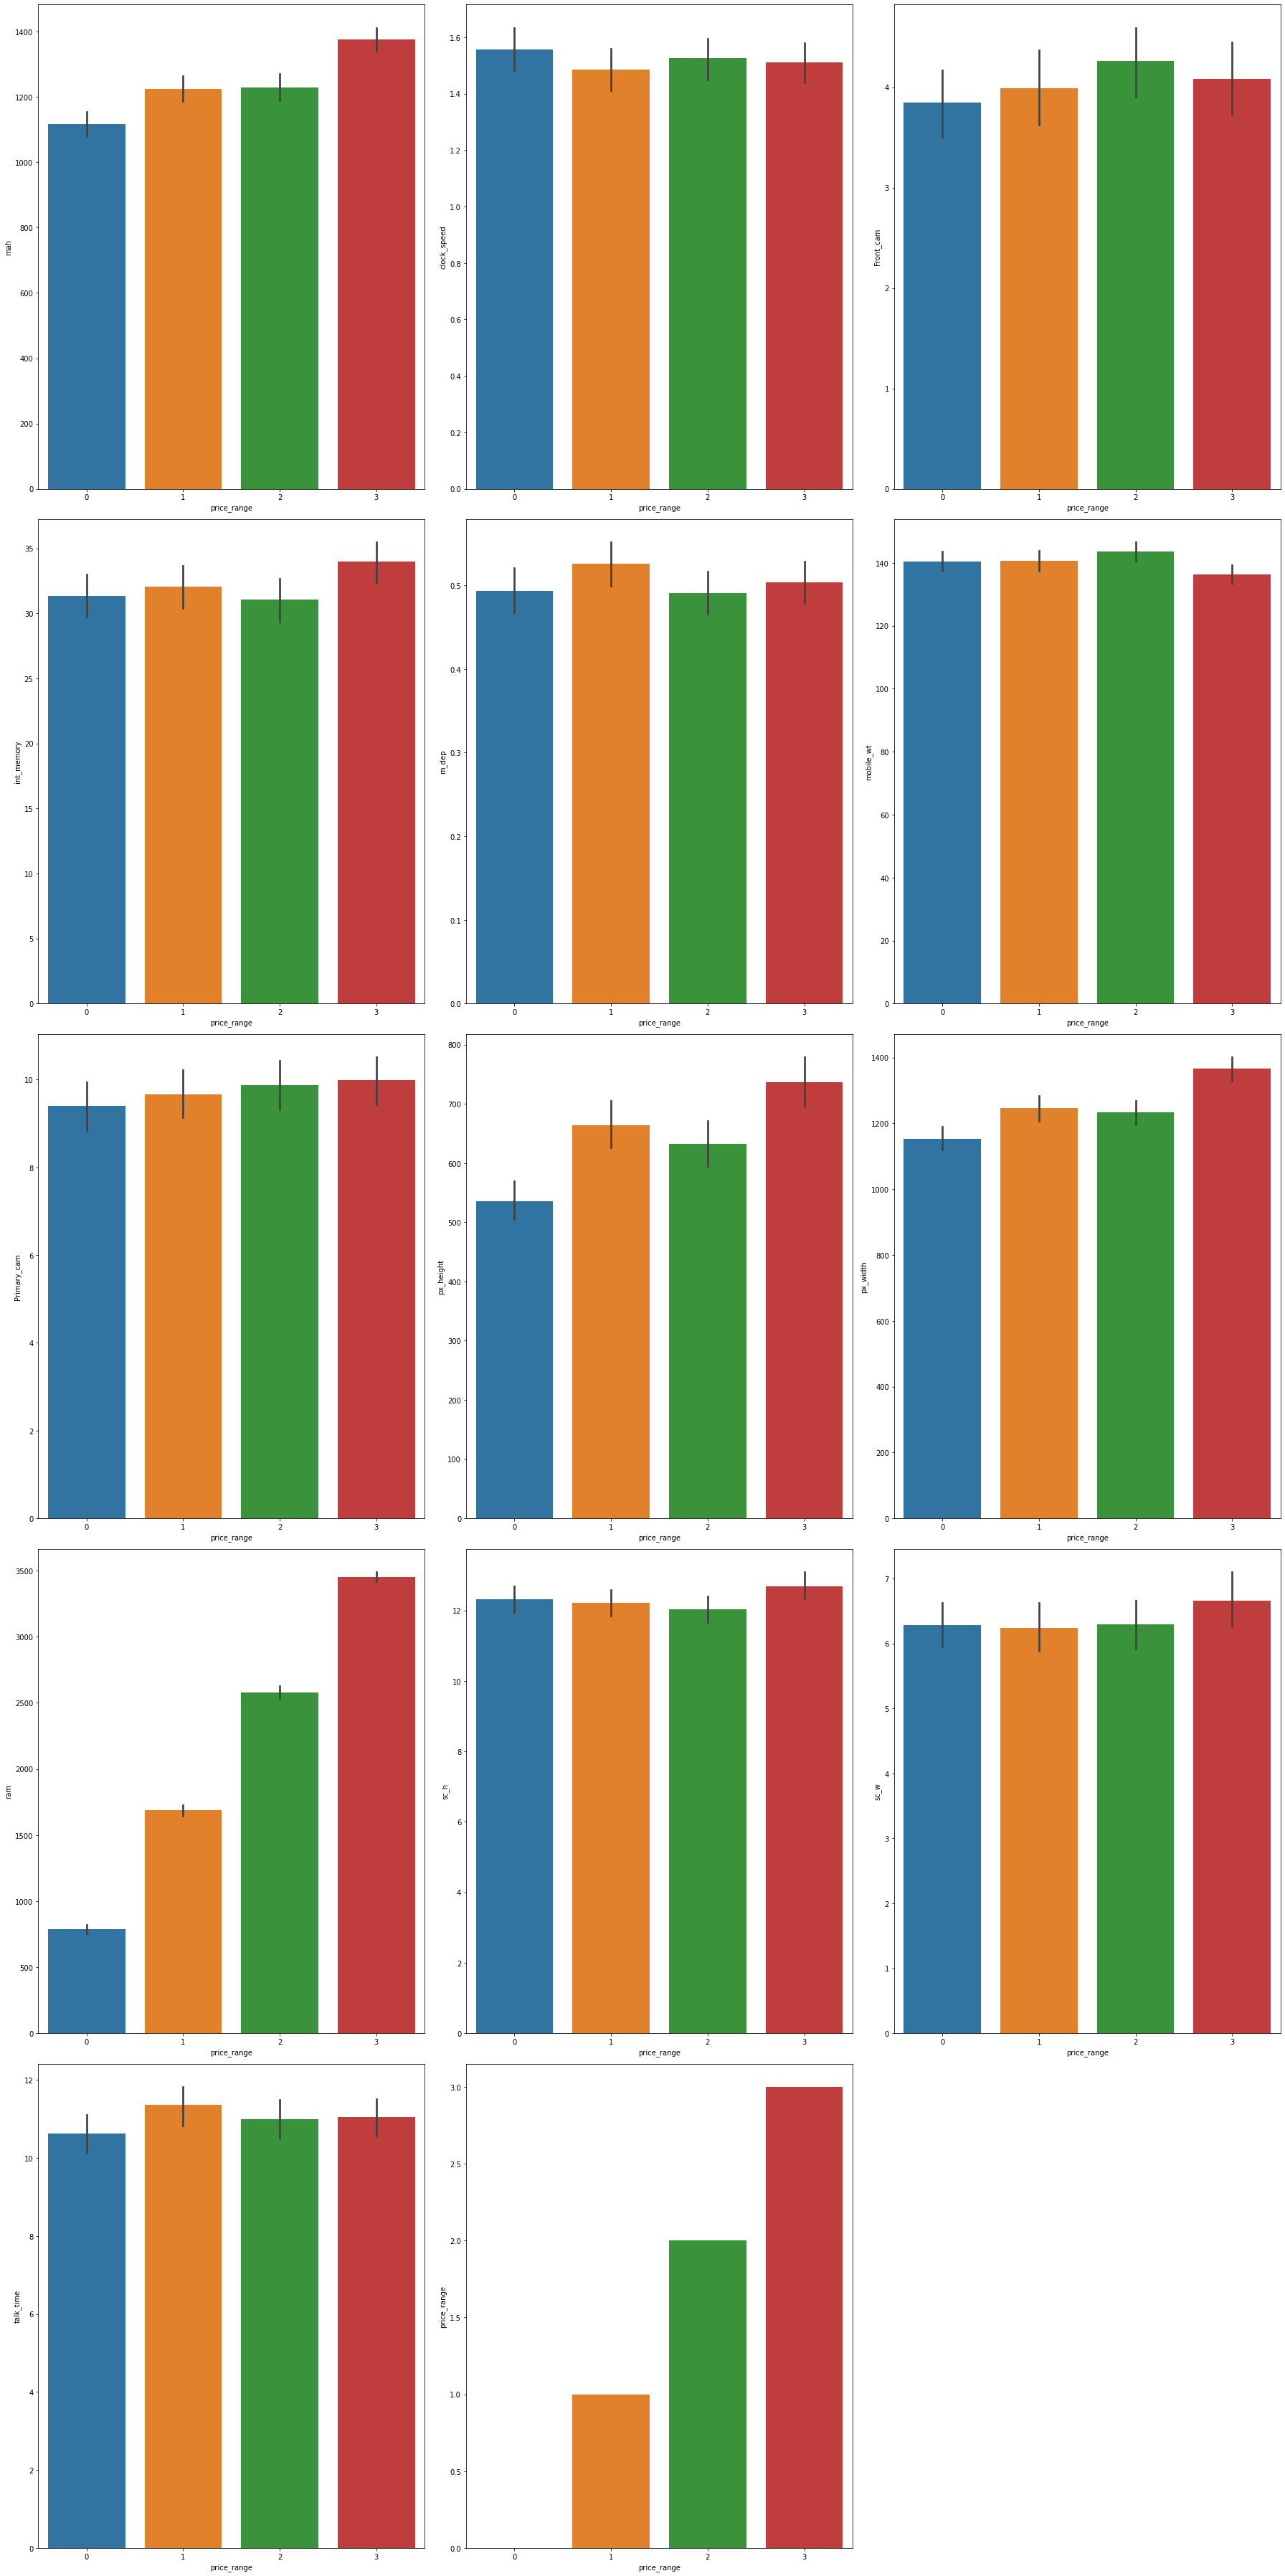

In [150]:
fig = plt.figure(figsize=(25,50))
count=1
for i in numarical_columns:
  plt.subplot(5,3,count)
  sns.barplot(x=df['price_range'],y=df[i])
  count+=1
  plt.tight_layout()

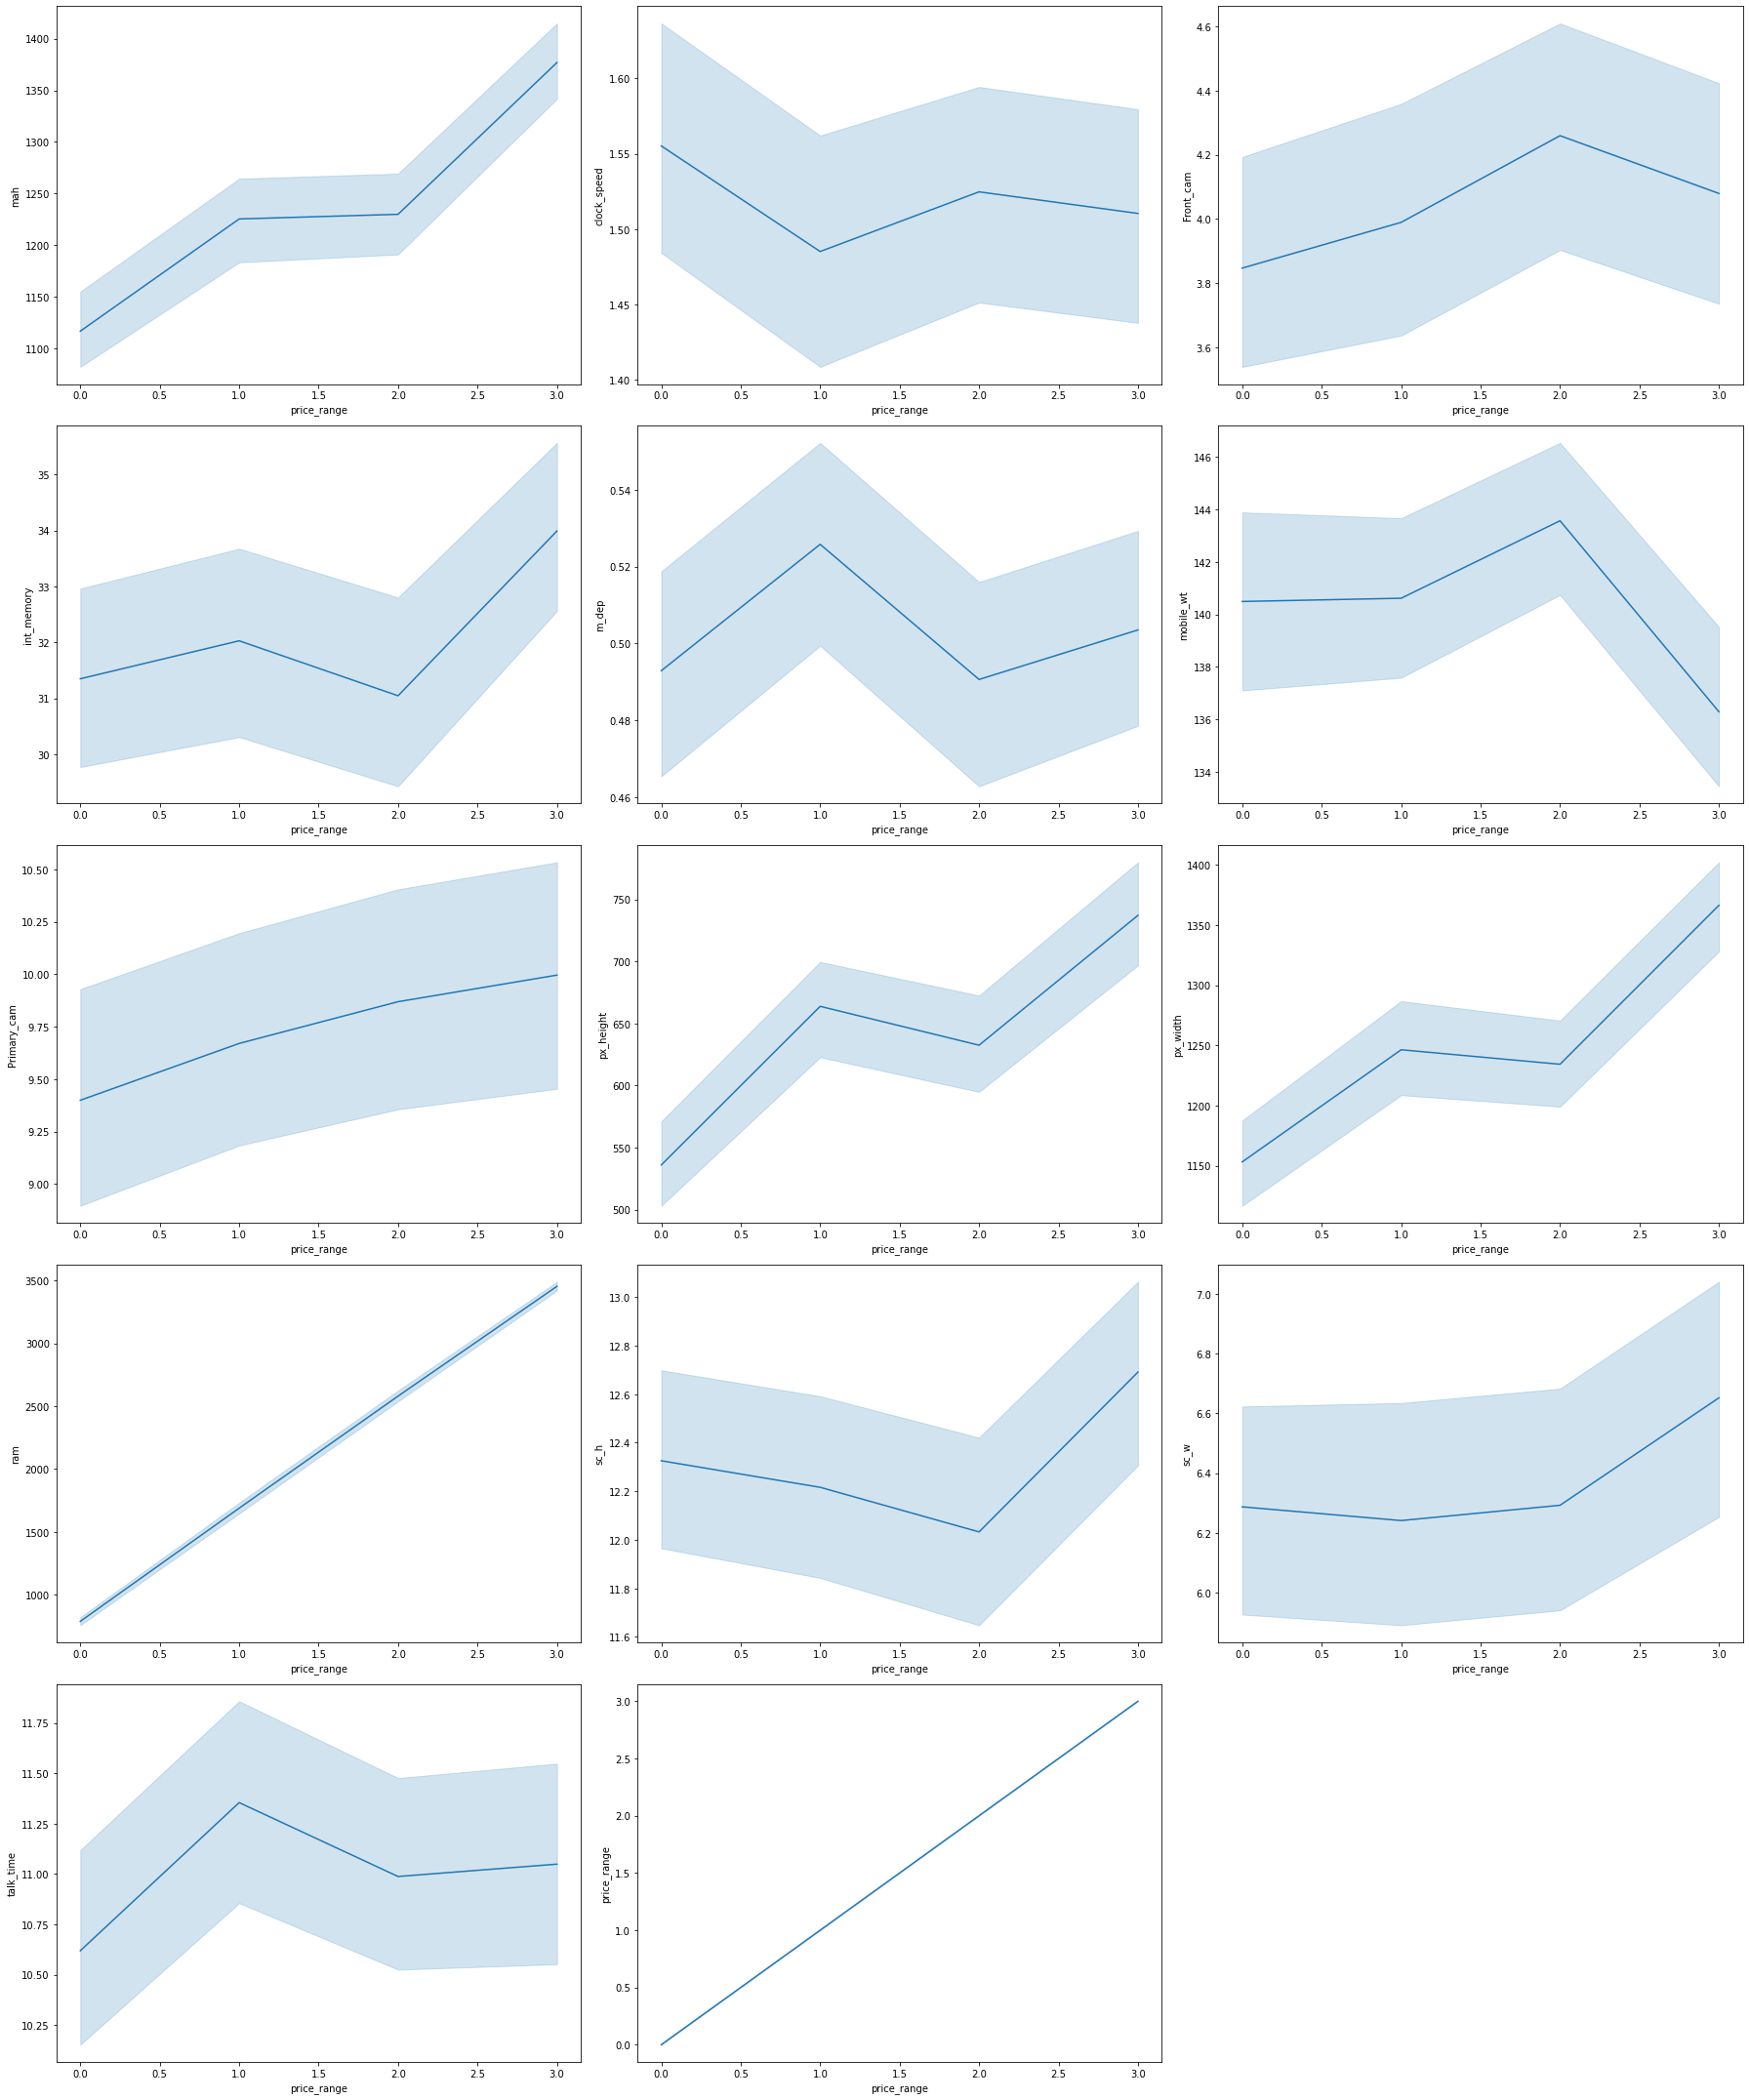

In [151]:
fig = plt.figure(figsize=(25,30))
count=1
for i in numarical_columns:
  plt.subplot(5,3,count)
  sns.lineplot(x=df['price_range'],y=df[i])
  count+=1
  plt.tight_layout()

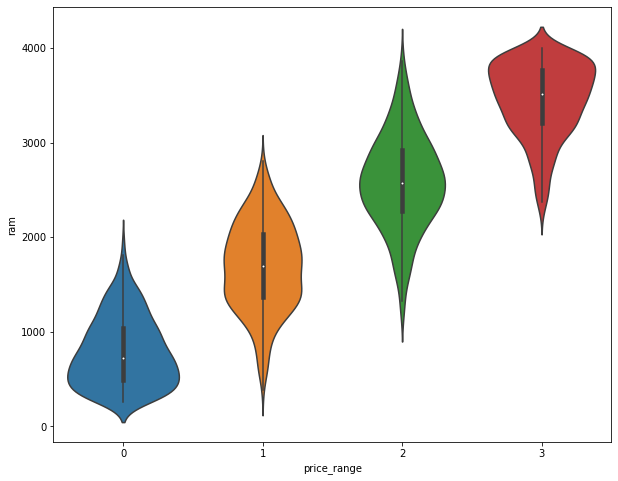

In [152]:
fig = plt.figure(figsize=(10,8))
sns.violinplot(x=df['price_range'],y=df['ram'])

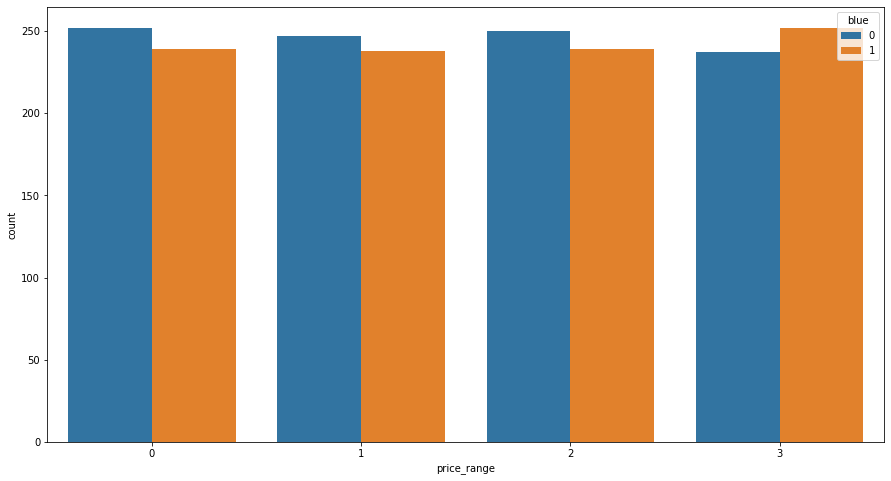

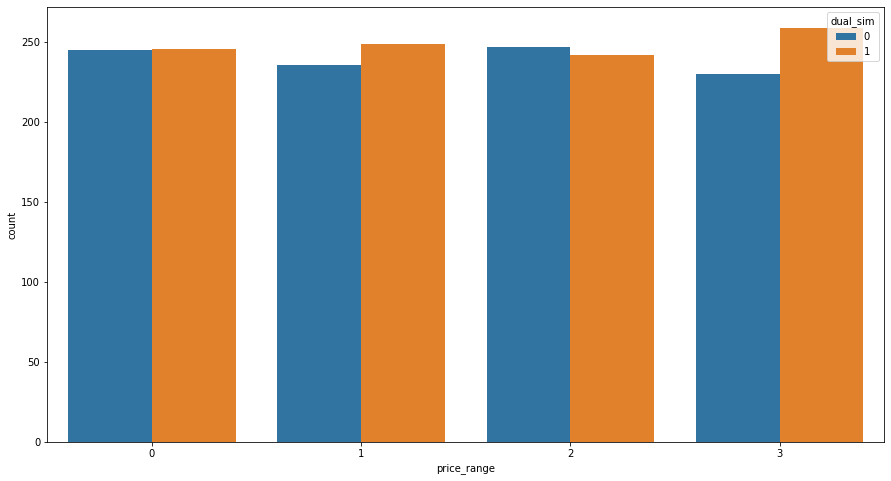

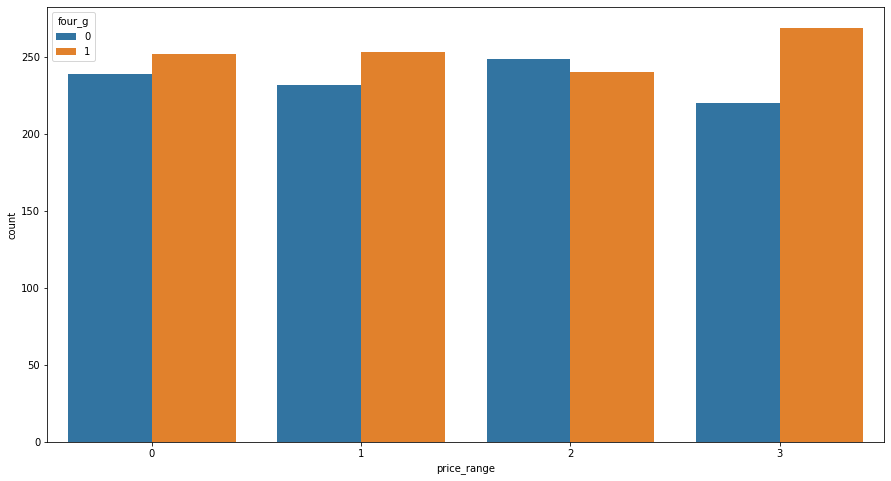

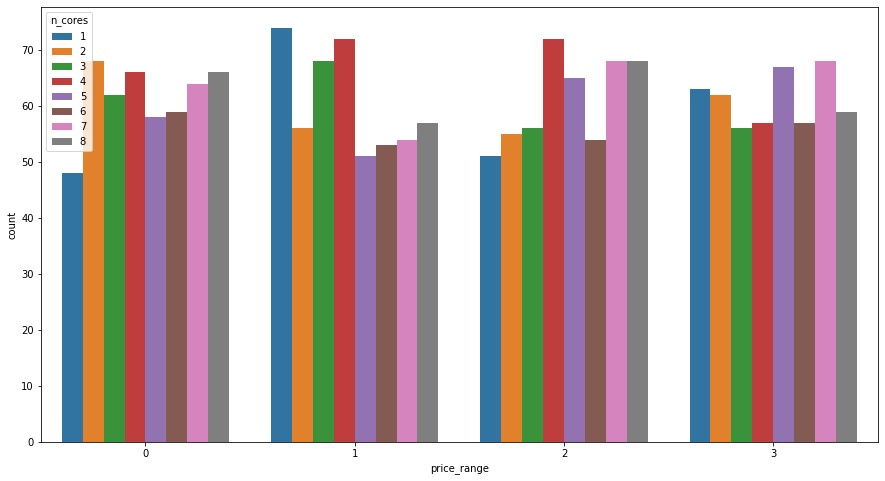

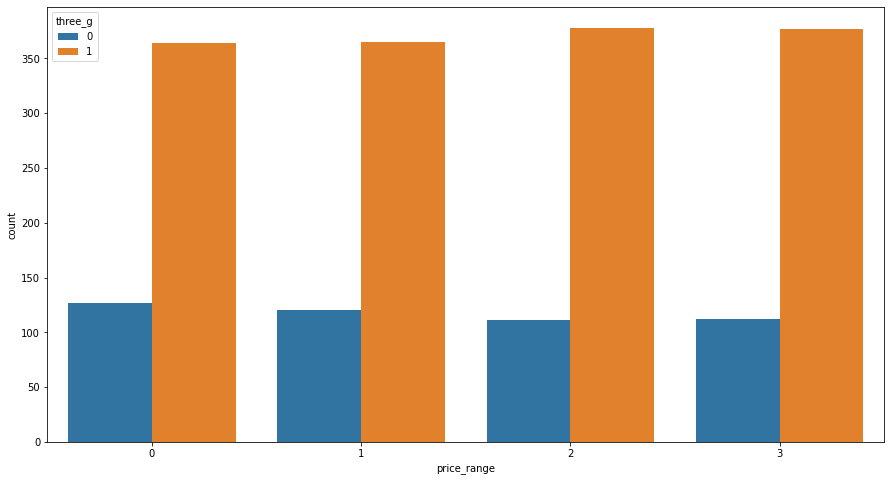

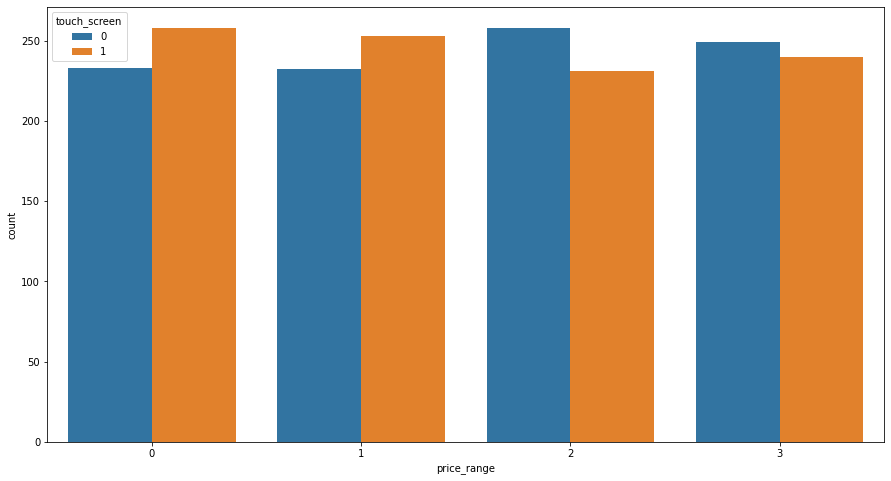

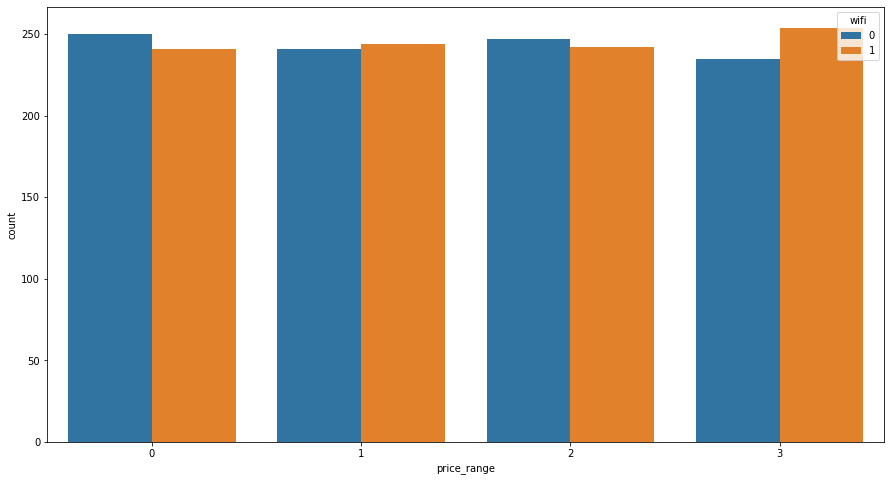

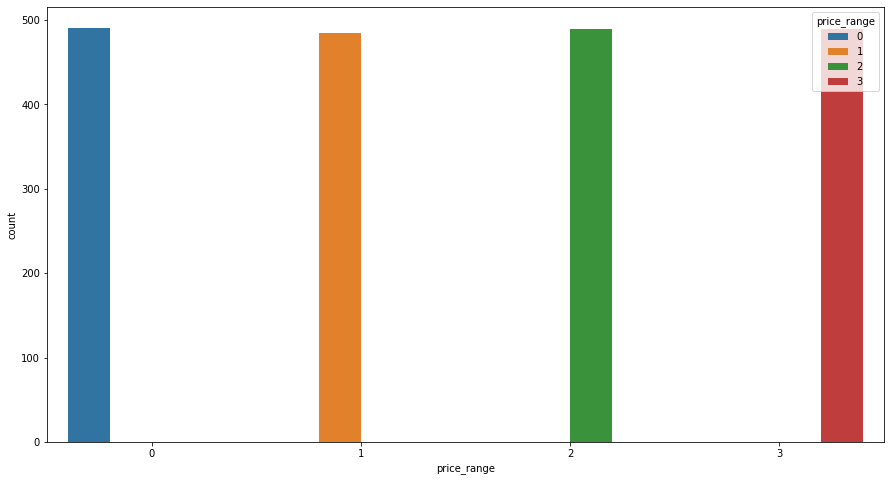

In [153]:
for i in categorical_columns:
  fig = plt.figure(figsize=(15,8))
  sns.countplot(x=df['price_range'],hue=df[i])
  plt.show()

## ***Multivariate analysis***

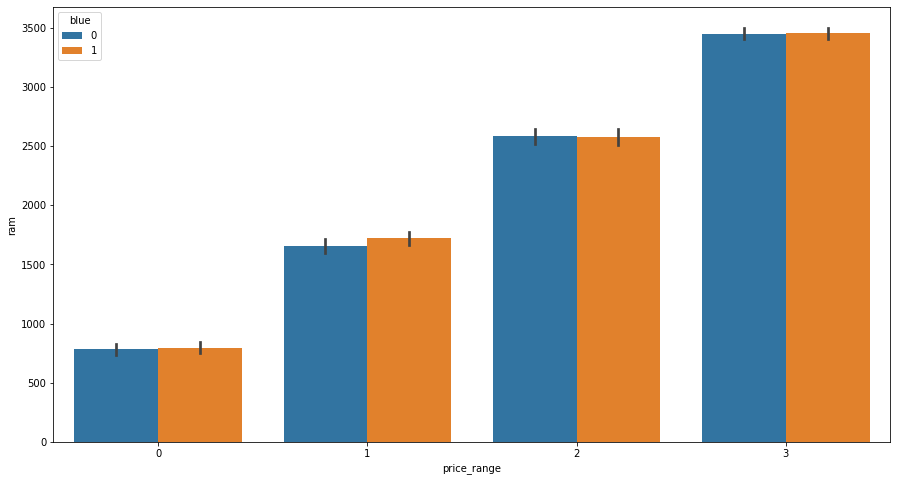

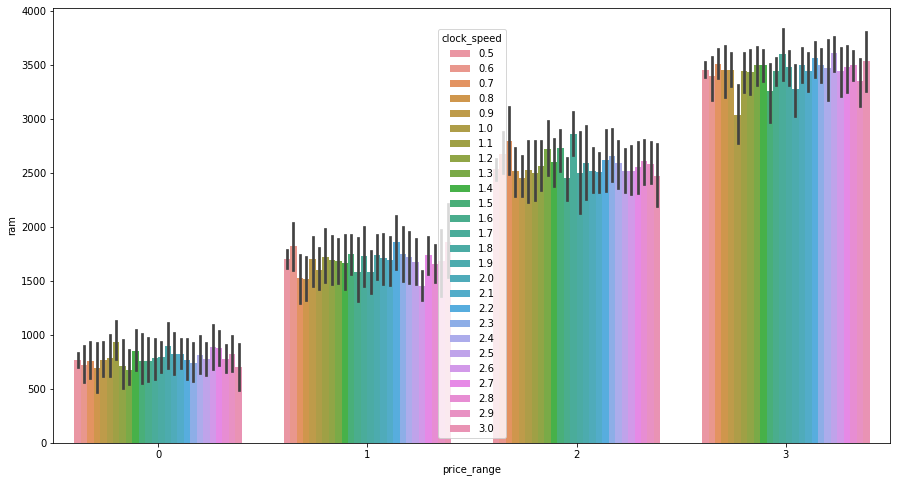

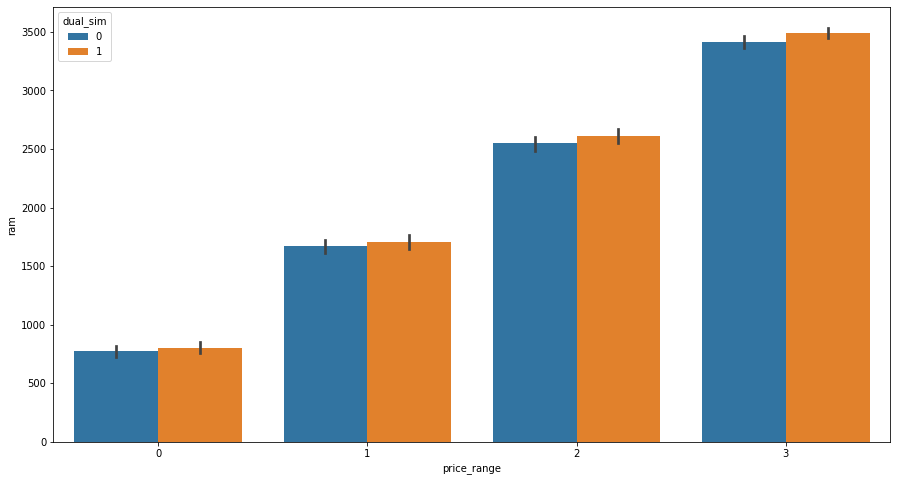

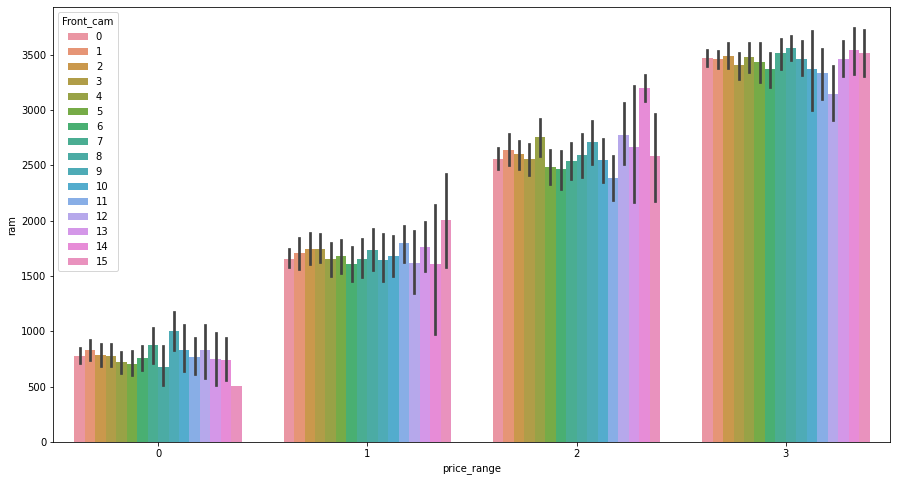

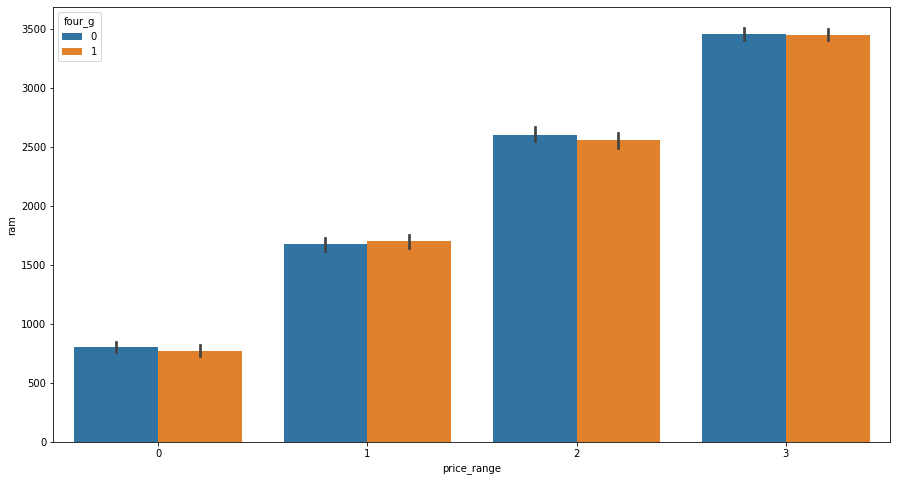

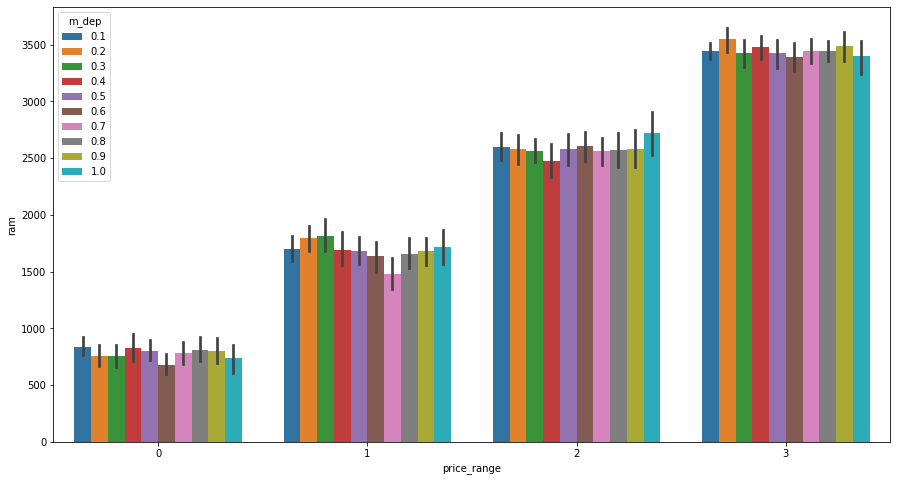

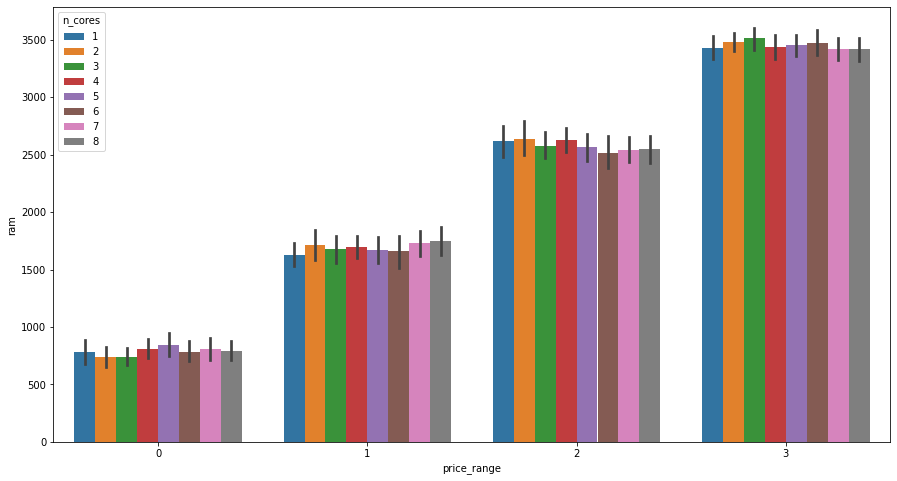

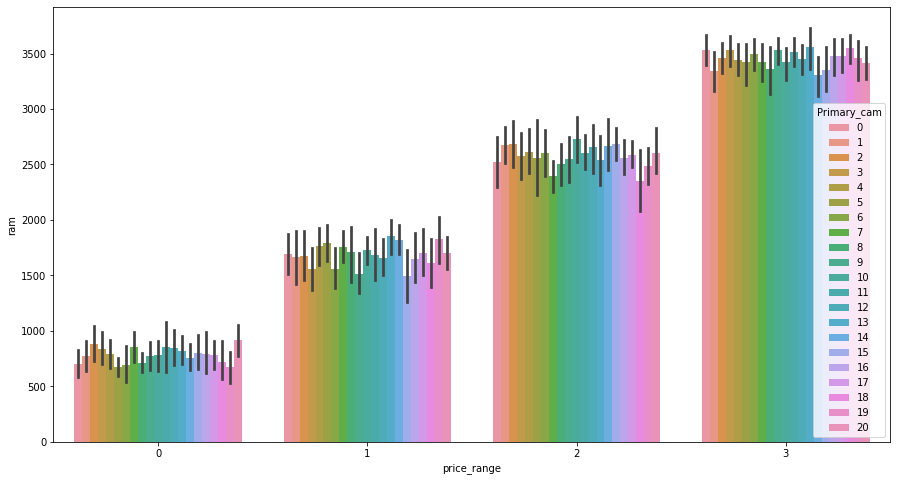

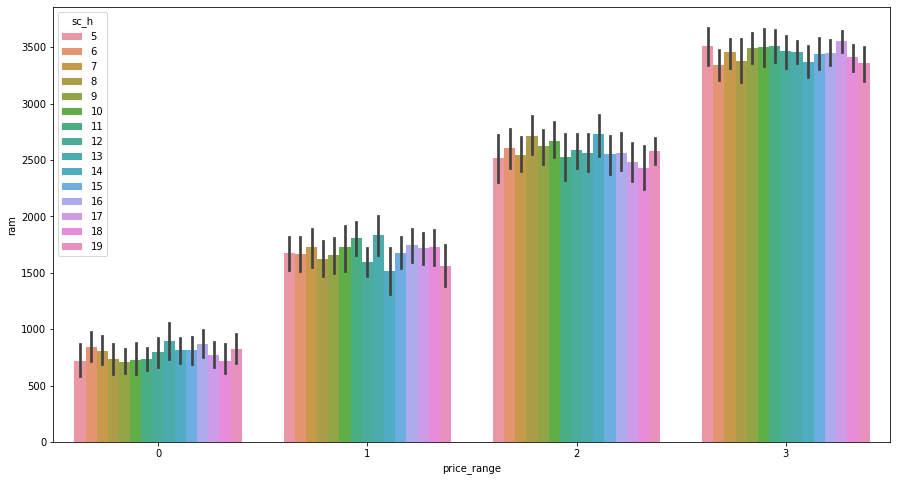

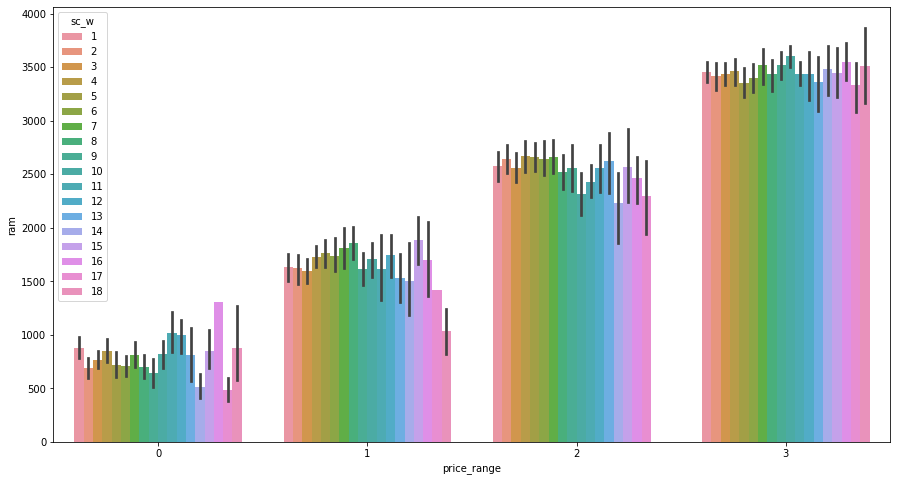

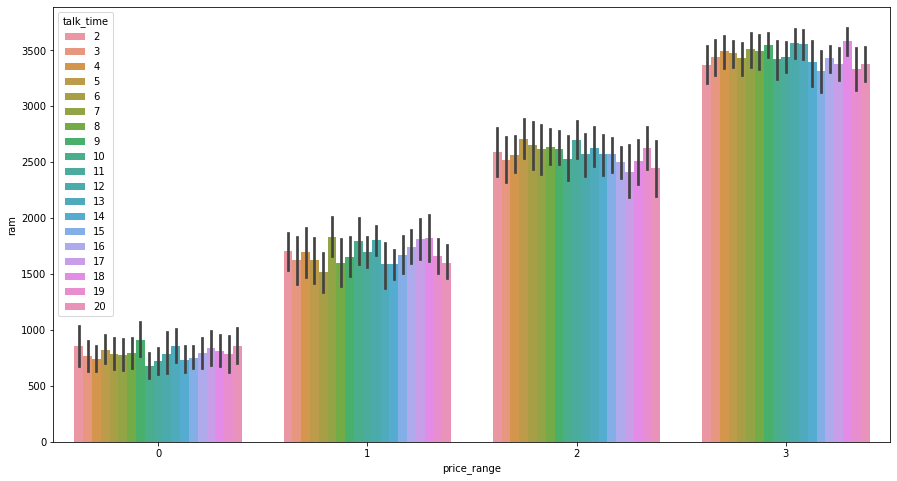

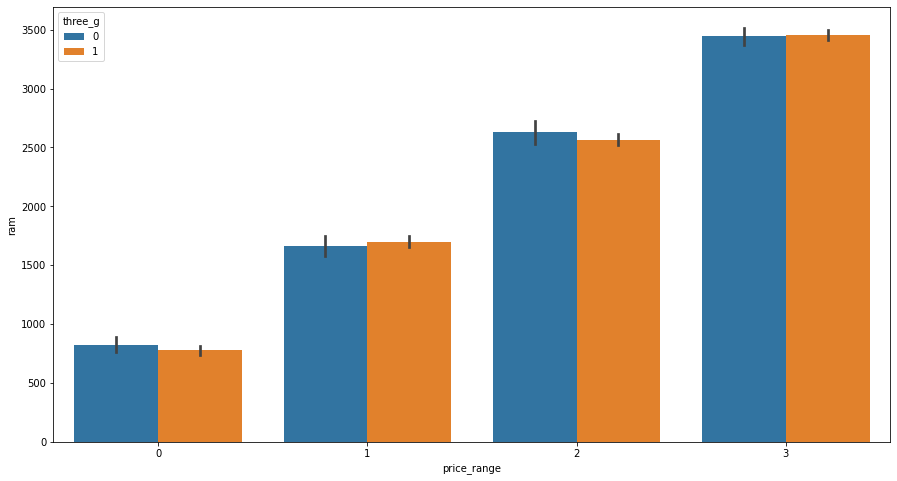

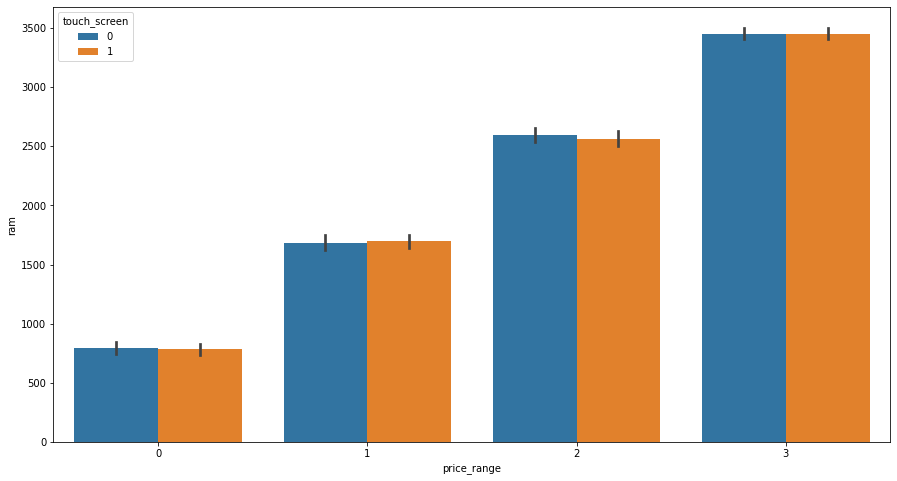

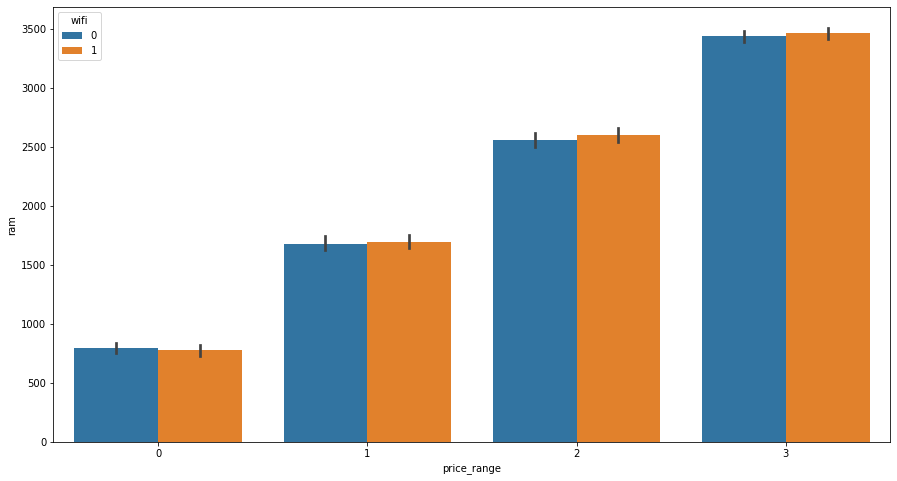

In [154]:
for i in ['blue', 'clock_speed', 'dual_sim', 'Front_cam', 'four_g', 'm_dep', 'n_cores', 'Primary_cam','sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']:
  fig = plt.figure(figsize=(15,8))
  sns.barplot(x=df['price_range'],y=df['ram'],hue=df[i])
  plt.show()

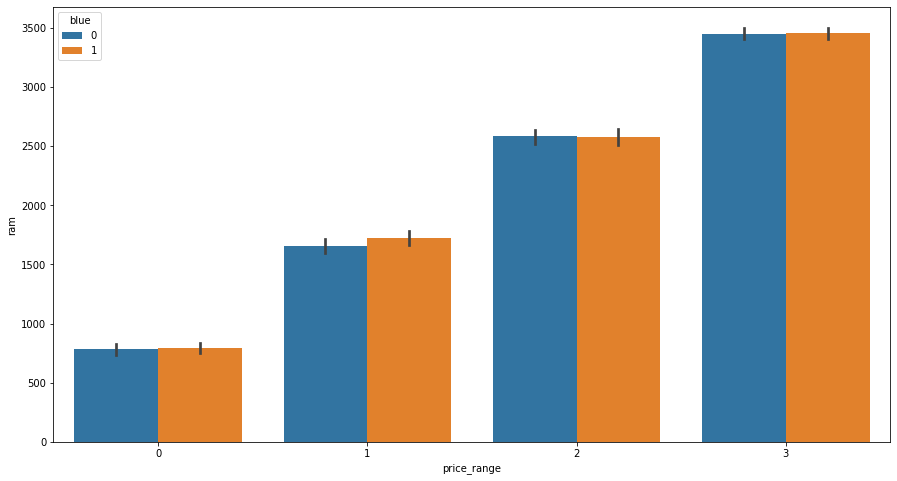

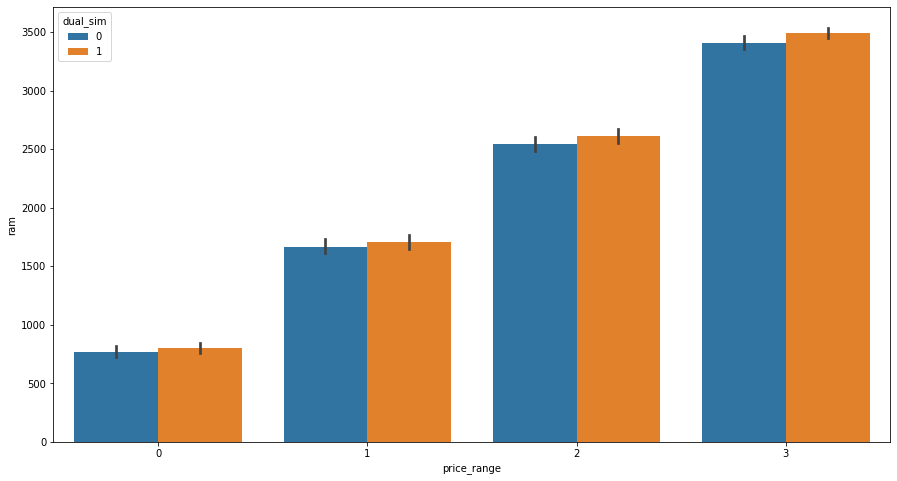

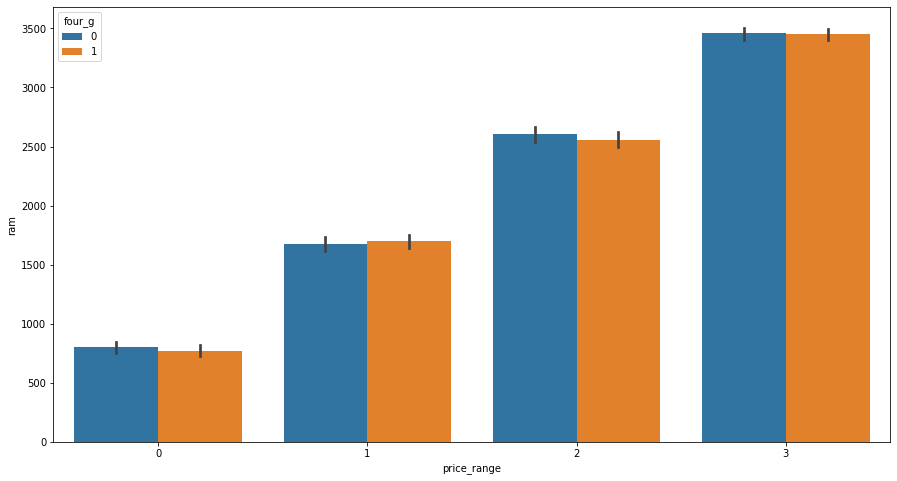

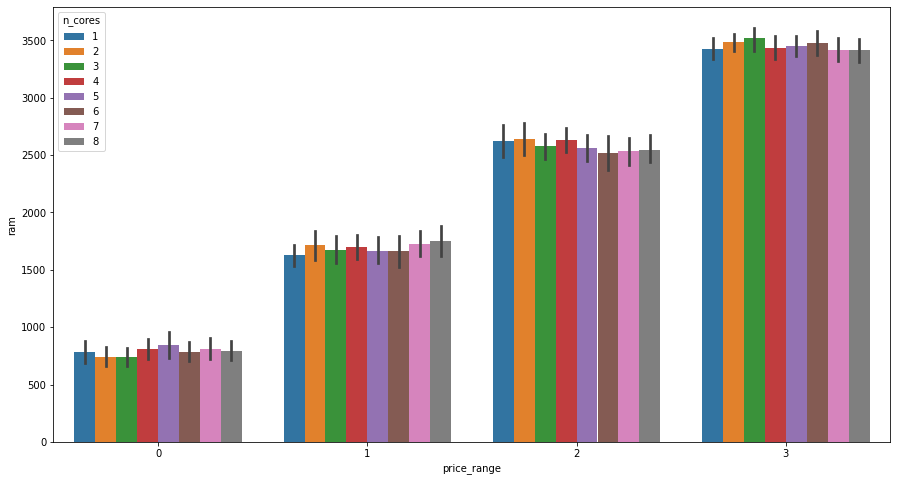

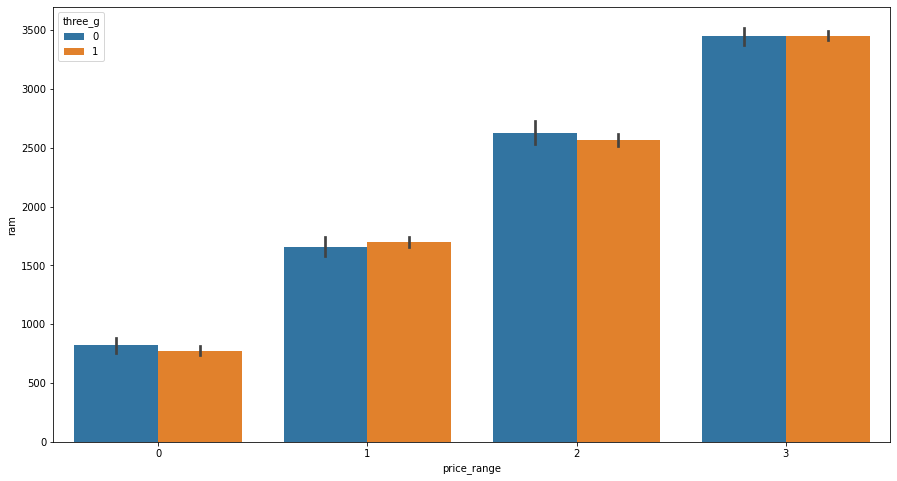

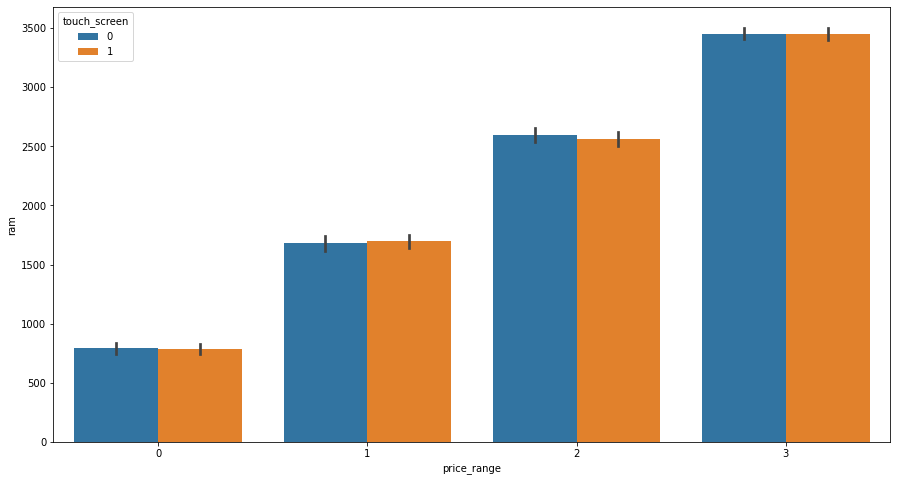

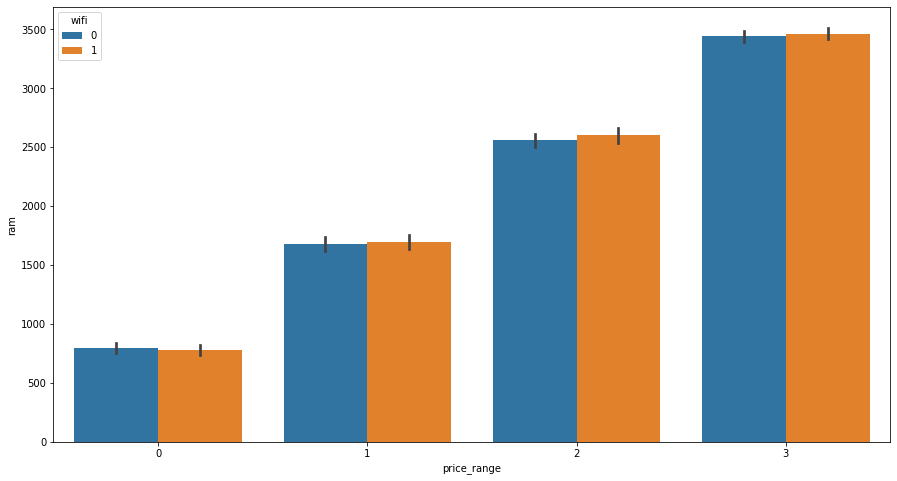

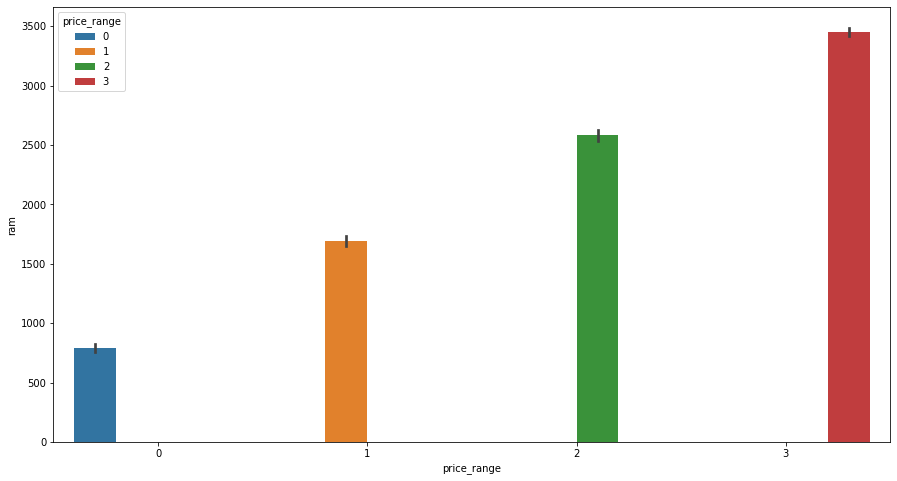

In [155]:
for i in categorical_columns:
  fig = plt.figure(figsize=(15,8))
  sns.barplot(x=df['price_range'],y=df['ram'],hue=df[i])
  plt.show()

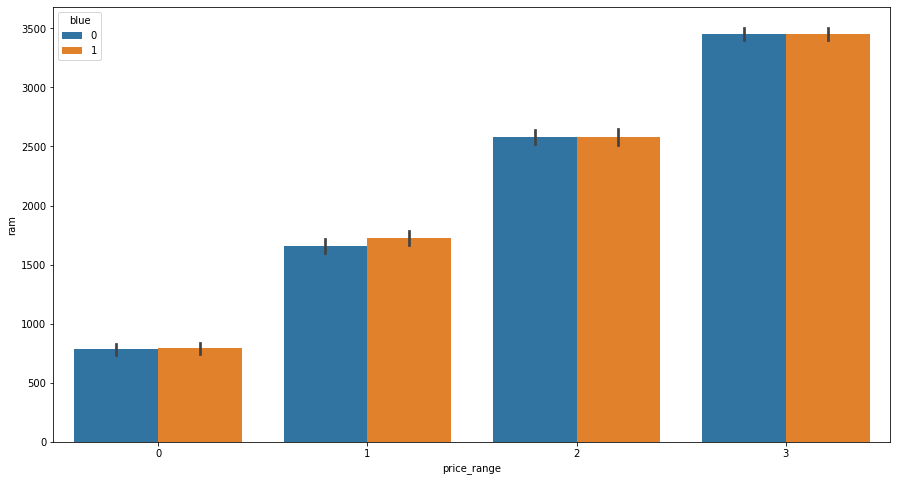

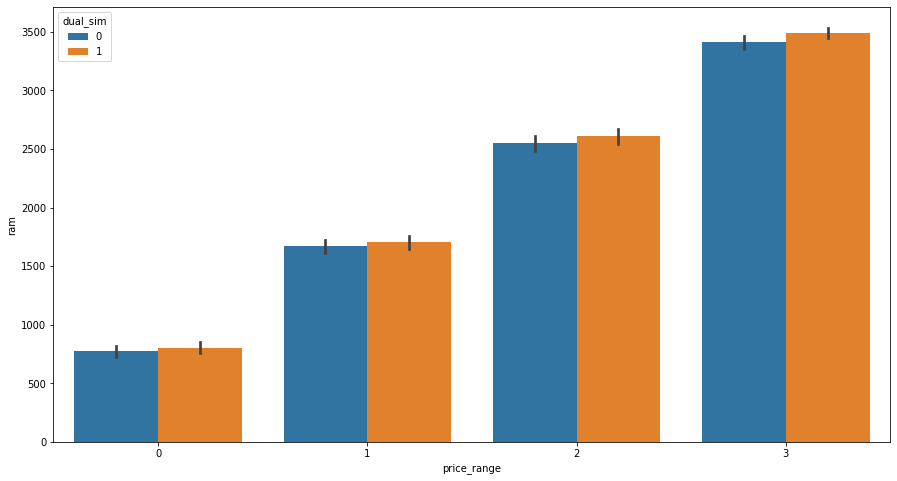

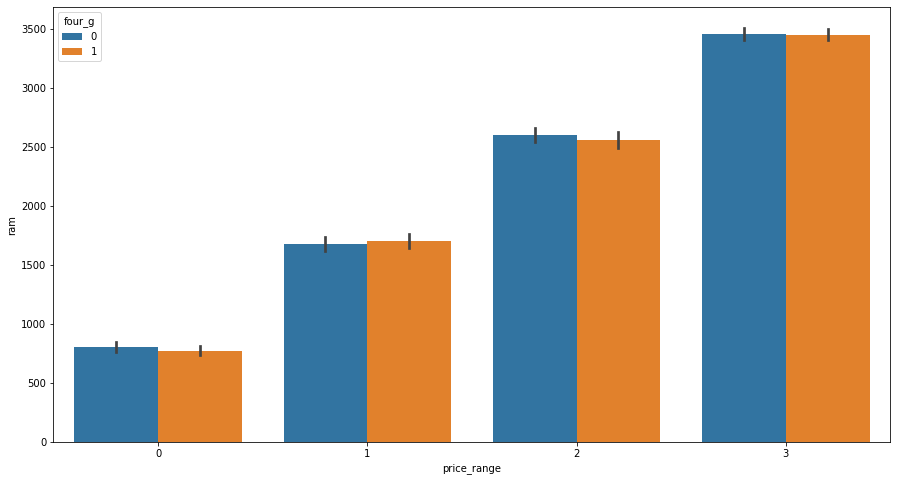

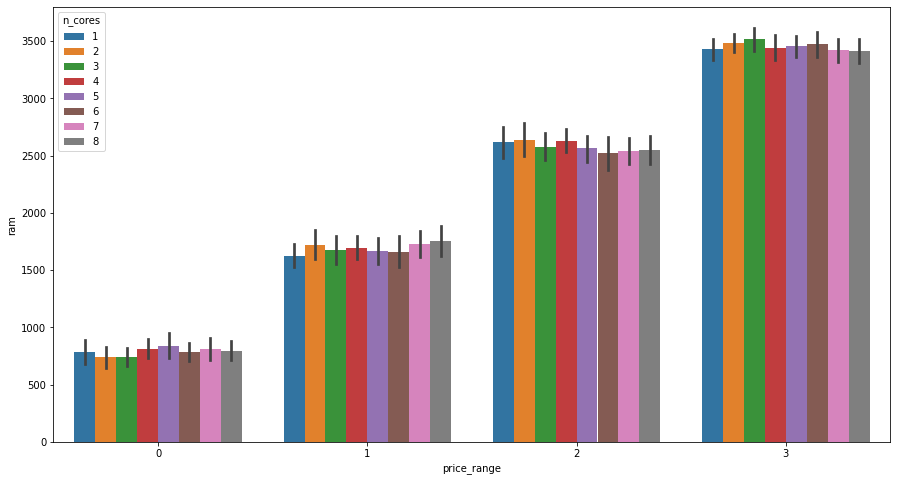

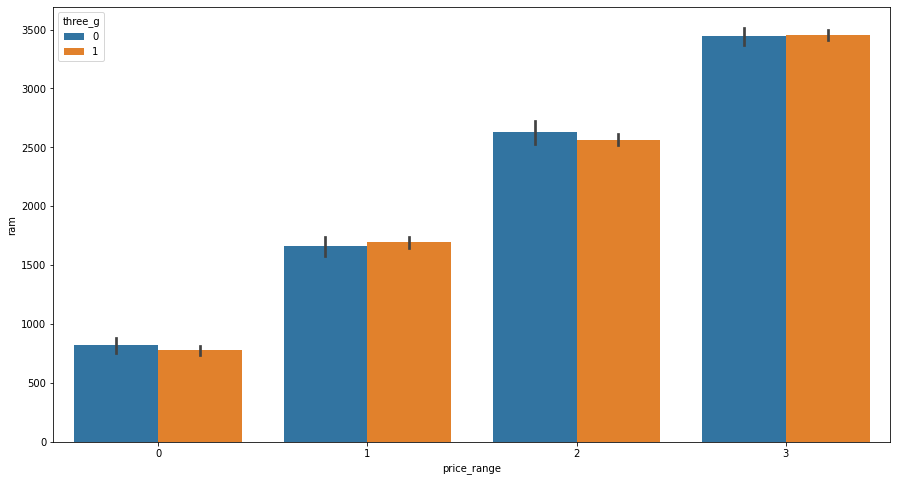

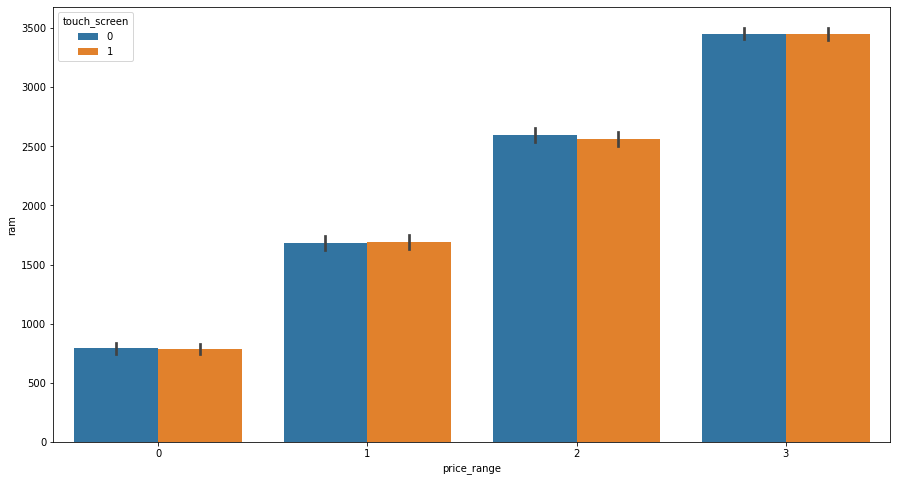

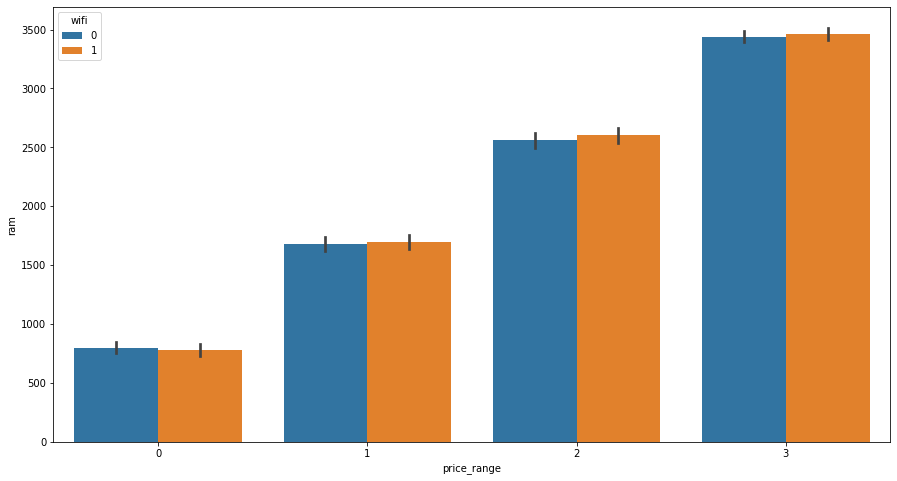

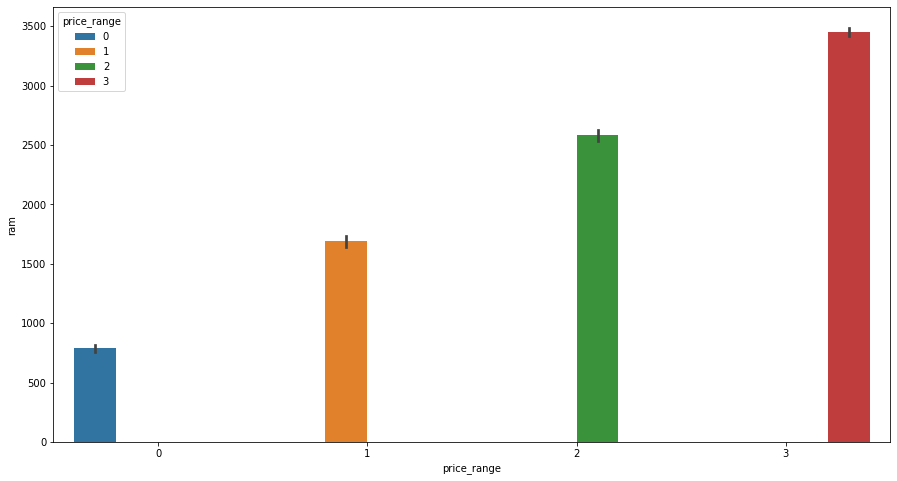

In [156]:
for i in categorical_columns:
  fig = plt.figure(figsize=(15,8))
  sns.barplot(x=df['price_range'],y=df['ram'],hue=df[i])

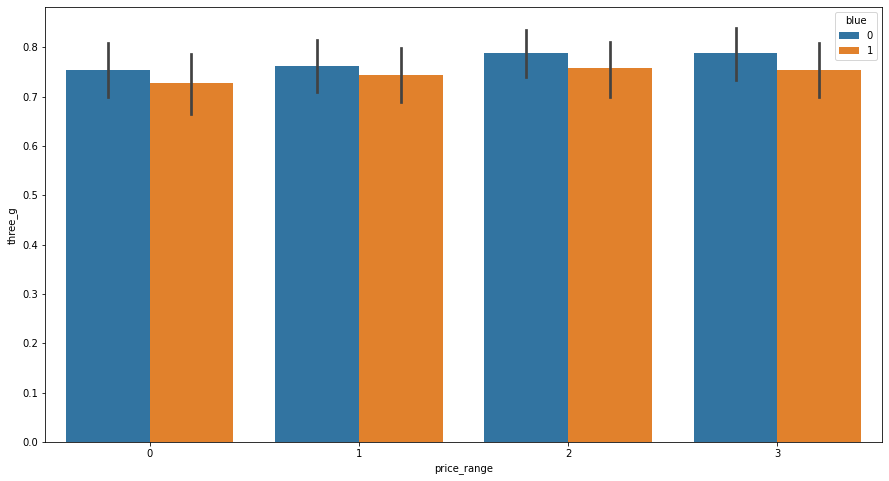

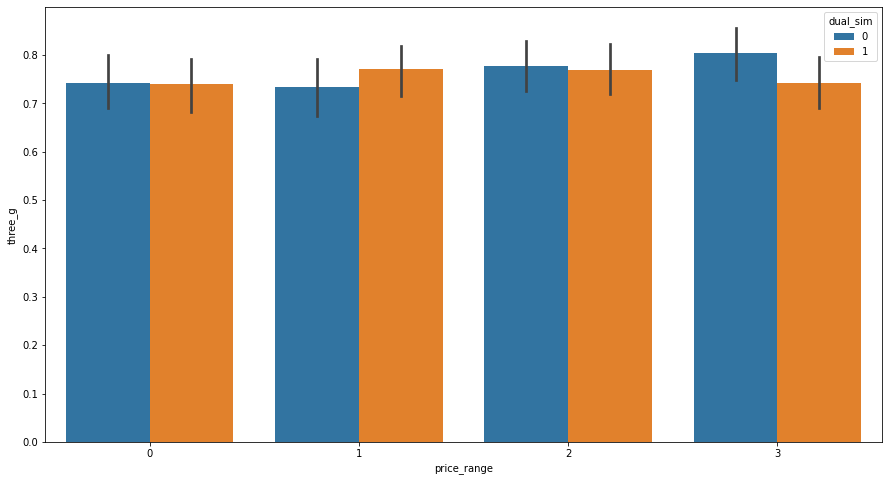

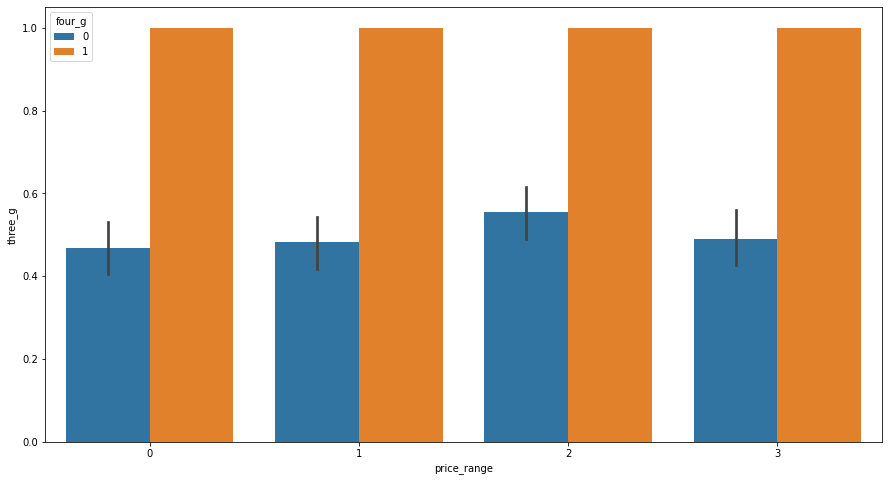

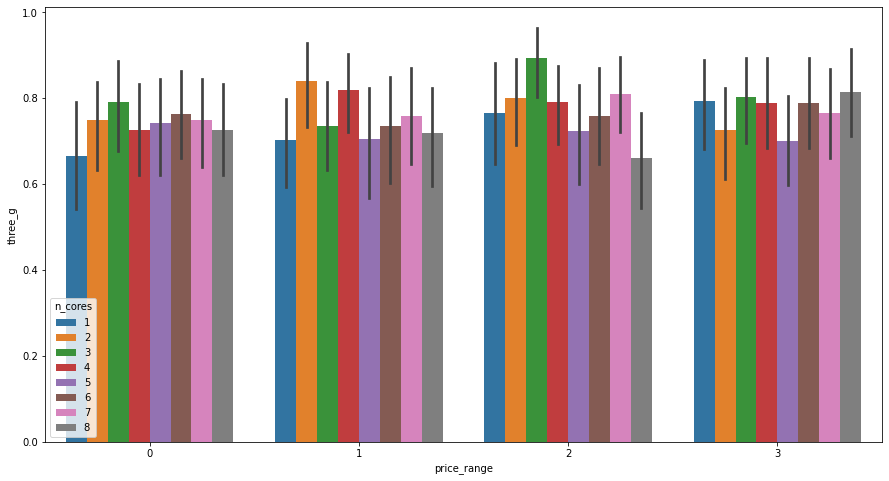

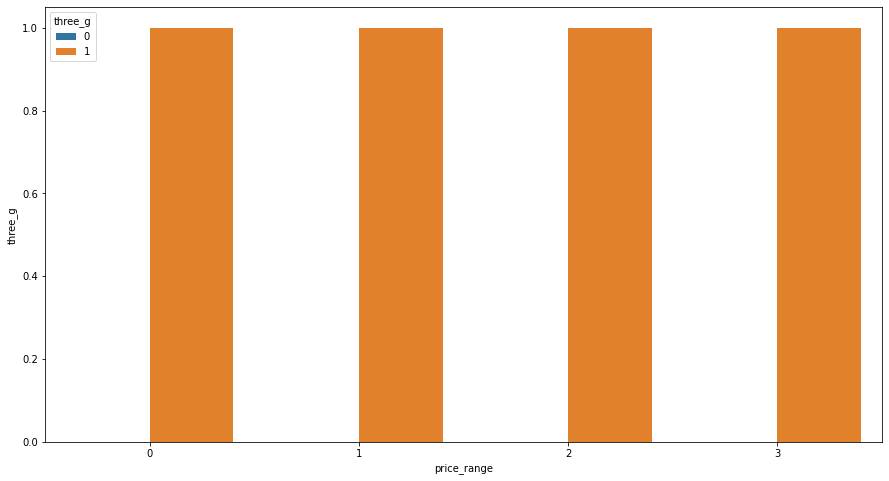

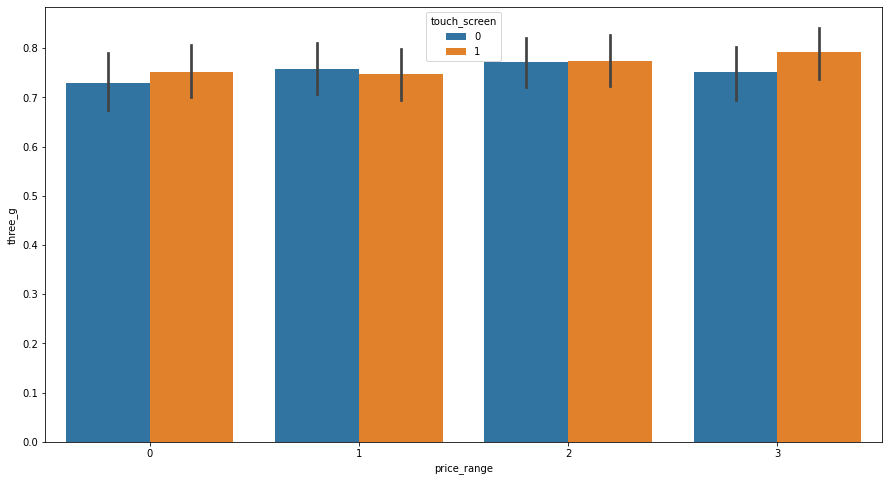

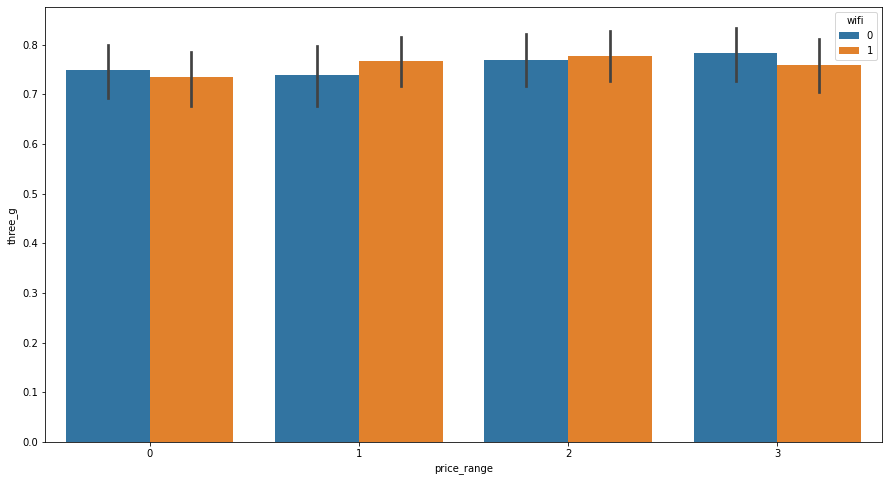

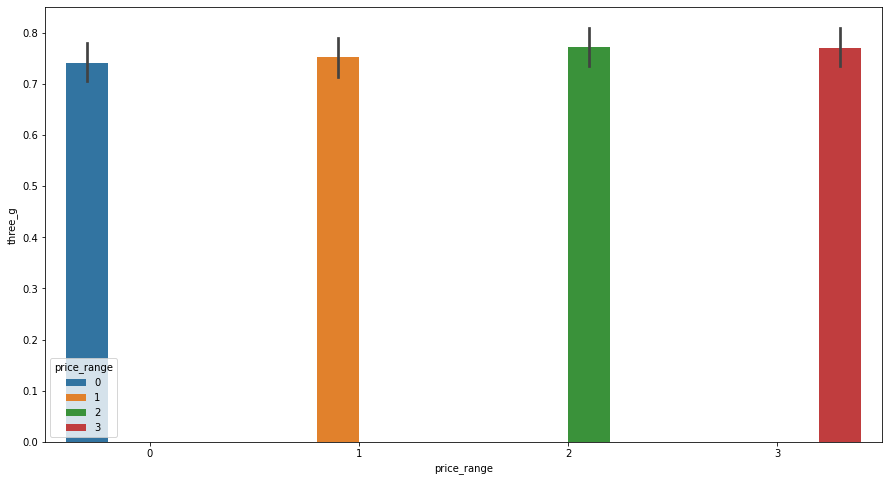

In [157]:
for i in categorical_columns:
  fig = plt.figure(figsize=(15,8))
  sns.barplot(x=df['price_range'],y=df['three_g'],hue=df[i])

* phones contain all features

In [158]:
df[(df['blue']==1)&(df['dual_sim']==1)&(df['Front_cam']==1)&(df['four_g']==1)&(df['three_g']==1)&(df['touch_screen']==1)&(df['wifi']==1)]

,mah,blue,clock_speed,dual_sim,Front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
208,664,1,1.1,1,1,1,51,0.1,110,7,...,701,1478,3629,19,15,6,1,1,1,3
628,1359,1,0.5,1,1,1,58,0.5,107,6,...,446,901,1076,16,8,4,1,1,1,0
998,1373,1,1.9,1,1,1,29,0.9,141,6,...,1220,1348,2752,15,2,7,1,1,1,3
1095,775,1,2.5,1,1,1,10,0.1,185,7,...,444,1555,1719,19,3,18,1,1,1,1
1287,860,1,1.3,1,1,1,49,0.7,141,6,...,692,979,3869,16,14,20,1,1,1,3
1430,1672,1,1.7,1,1,1,44,0.5,172,8,...,1250,1435,1348,11,6,7,1,1,1,1
1491,1130,1,0.5,1,1,1,29,0.7,130,1,...,593,1327,432,6,1,10,1,1,1,0
1562,911,1,2.2,1,1,1,28,0.5,182,2,...,157,763,2638,8,4,13,1,1,1,1
1595,832,1,0.5,1,1,1,5,0.1,165,5,...,9,1944,3946,12,5,14,1,1,1,3
1630,612,1,0.5,1,1,1,20,0.8,179,8,...,1145,1487,3282,16,2,18,1,1,1,3


* basic phones with no features

In [159]:
df[(df['blue']==0)&(df['dual_sim']==0)&(df['Front_cam']==0)&(df['four_g']==0)&(df['three_g']==0)&(df['touch_screen']==0)&(df['wifi']==0)]

,mah,blue,clock_speed,dual_sim,Front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
67,1866,0,1.4,0,0,0,30,0.5,182,3,...,108,1781,3834,16,11,8,0,0,0,3
158,1356,0,2.8,0,0,0,29,0.5,198,6,...,1612,1983,3702,17,10,19,0,0,0,3
251,1210,0,0.5,0,0,0,63,0.1,93,5,...,1177,1462,2394,17,9,7,0,0,0,2
311,1707,0,1.4,0,0,0,41,0.8,80,7,...,1331,1388,1774,12,4,10,0,0,0,2
406,1007,0,2.0,0,0,0,45,0.1,95,5,...,1186,1529,3648,9,11,16,0,0,0,3
488,1949,0,1.8,0,0,0,20,0.8,186,5,...,518,592,1125,17,10,9,0,0,0,1
640,600,0,0.5,0,0,0,14,0.8,112,5,...,320,747,1655,18,4,9,0,0,0,0
889,1829,0,1.7,0,0,0,36,0.8,112,5,...,291,563,1475,11,4,7,0,0,0,1
1958,1063,0,2.0,0,0,0,27,0.2,86,6,...,201,582,2668,12,5,19,0,0,0,2


## ***Correlation Matrix***

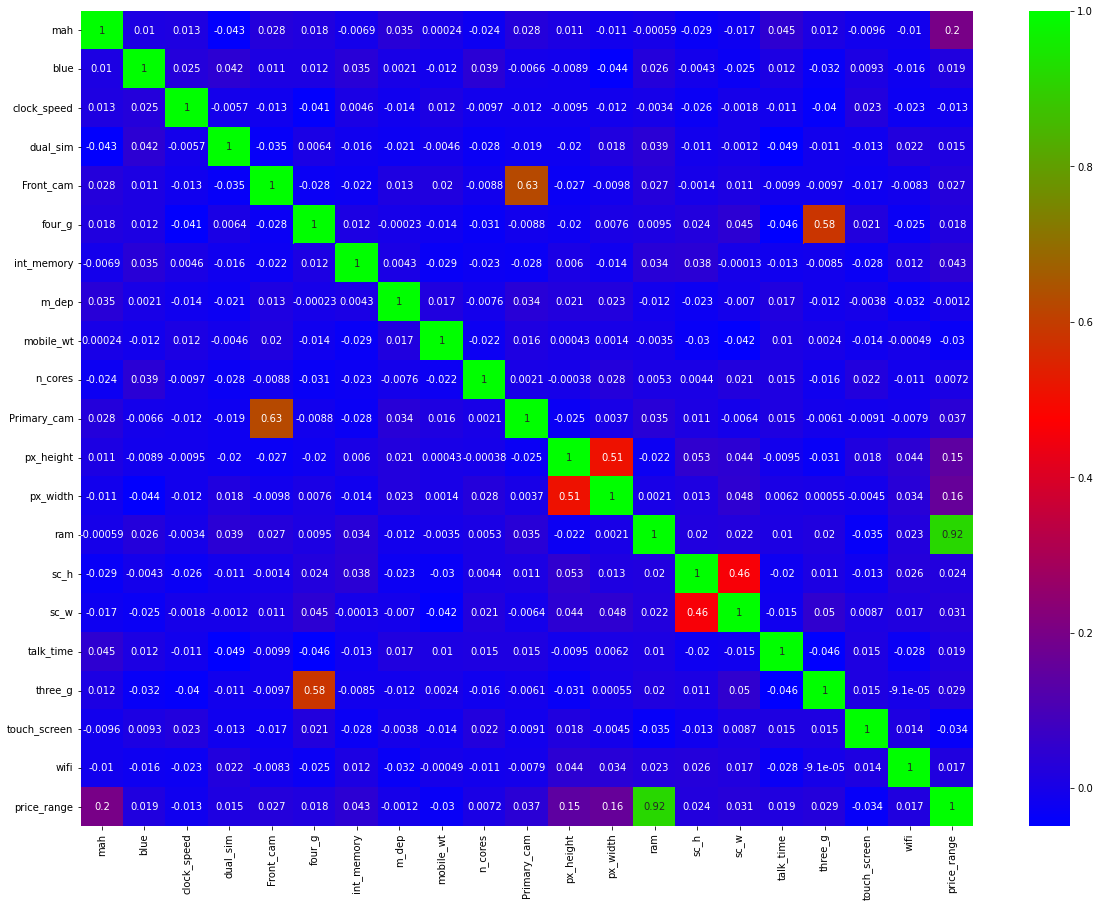

In [160]:
fig = plt.figure(figsize=(20,15))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='brg')

# ***Feature Selection***

### Split Independent and dependent variables

In [161]:
# create independent variables dataframe

x=df.drop('price_range',axis=1)

# create dependent variable series

y=df['price_range']

In [162]:
# import seleck k best module from feature selection

from sklearn.feature_selection import SelectKBest

# import chi square module from feature selection

from sklearn.feature_selection import chi2

In [163]:
# select top features

topfeatures = SelectKBest(score_func=chi2, k=15)

fit_top_features = topfeatures.fit(x,y)

In [164]:
# create dataframe of top features

dfscores = pd.DataFrame(fit_top_features.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [165]:
# concatinate feature score dataframe

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']

In [166]:
featureScores

,Feature,Score
0,mah,13505.022467
1,blue,0.531374
2,clock_speed,0.823457
3,dual_sim,0.678041
4,Front_cam,10.834975
5,four_g,1.698998
6,int_memory,79.957546
7,m_dep,0.749824
8,mobile_wt,93.737357
9,n_cores,8.379480


In [167]:
print(featureScores.nlargest(15,'Score'))

         Feature          Score
13           ram  909561.357223
11     px_height   15908.164022
0            mah   13505.022467
12      px_width    9079.507773
8      mobile_wt      93.737357
6     int_memory      79.957546
16     talk_time      12.131473
4      Front_cam      10.834975
10   Primary_cam      10.221820
14          sc_h       9.168885
9        n_cores       8.379480
15          sc_w       8.374349
18  touch_screen       1.884086
5         four_g       1.698998
2    clock_speed       0.823457


In [168]:
# select top 15 features to train the data

x=df[['ram','px_height','mah','px_width','mobile_wt','int_memory','talk_time','Front_cam','Primary_cam','sc_h','n_cores','sc_w','touch_screen','four_g','clock_speed']]
y=df['price_range']

# ***Data Modling*** 

### **Train Teat split**

In [169]:
# split the data into test and train part 

# import train test split from model selection

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.20, random_state=1)

In [170]:
# print the shape of the split

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1563, 15)
(391, 15)
(1563,)
(391,)


### **Standerd Scaling**

In [171]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

## Logistic Regression

In [180]:
# import Logistic Regression

from sklearn.linear_model import LogisticRegression

# create object of logistic regression

lr=LogisticRegression(random_state=1)

# fit the training data on logistic regression

lr.fit(x_train,y_train)

# predict on training data

y_train_pred=lr.predict(x_train)

# predict on test data

y_pred=lr.predict(x_test)

In [181]:
# import accuracy score from metrics

from sklearn.metrics import accuracy_score

# check accuracy score on traing data

accuracy_score(y_train,y_train_pred)

0.9756877799104287

In [182]:
# check accuracy score on test data

accuracy_score(y_test,y_pred)

0.9667519181585678

In [183]:
from sklearn.metrics import classification_report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       389
           1       0.97      0.96      0.97       375
           2       0.98      0.95      0.97       400
           3       0.98      0.99      0.99       399

    accuracy                           0.98      1563
   macro avg       0.98      0.98      0.98      1563
weighted avg       0.98      0.98      0.98      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.96      0.95      0.96       110
           2       0.93      0.96      0.94        89
           3       0.98      0.98      0.98        90

    accuracy                           0.97       391
   macro avg       0.97      0.97      0.97       391
weighted avg       0.97      0.97      0.97       391



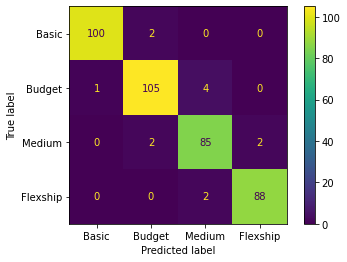

In [184]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

## Decision Tree

In [188]:
# import decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# create object of Decision tree

dt=DecisionTreeClassifier(random_state=1)

# fit the training data on logistic regression

dt.fit(x_train,y_train)

# predict on training data

y_train_pred=dt.predict(x_train)

# predict on test data

y_pred=dt.predict(x_test)

In [189]:
# check accuracy score on traing data

accuracy_score(y_train,y_train_pred)

1.0

In [190]:
# check accuracy score on test data

accuracy_score(y_test,y_pred)

0.8439897698209718

In [191]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       375
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       399

    accuracy                           1.00      1563
   macro avg       1.00      1.00      1.00      1563
weighted avg       1.00      1.00      1.00      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       102
           1       0.83      0.73      0.78       110
           2       0.74      0.79      0.76        89
           3       0.90      0.93      0.92        90

    accuracy                           0.84       391
   macro avg       0.84      0.85      0.84       391
weighted avg       0.84      0.84      0.84       391



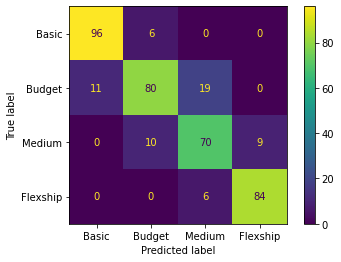

In [192]:
plot_confusion_matrix(dt ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

### Decision tree (Hyper perameter tuning)

In [193]:
# paramter grid values for hyperparameter tunning.

grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,7,8,9,10,11,12],
             'splitter':['best','random'],
             'min_samples_split':[3,5,7,9],
             'max_features':['auto','sqrt','log2',None]}

In [199]:
# import GridSearchCv from model selection
from sklearn.model_selection import GridSearchCV
dt_tune=GridSearchCV(dt,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dt_tune.fit(x_train,y_train)

Fitting 5 folds for each of 704 candidates, totalling 3520 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.486 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.460 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.498 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.503 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.478 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.278 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.288 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 7, 9],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [200]:
dt_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

In [202]:
dt_best=DecisionTreeClassifier(criterion='entropy',max_depth= 8,max_features= None,min_samples_split= 3,splitter= 'best')
dt_best.fit(x_train,y_train)

# predict on training data

y_train_pred=dt_best.predict(x_train)

# predict on test data

y_pred=dt_best.predict(x_test)

In [203]:
accuracy_score(y_train,y_train_pred)

0.980806142034549

In [204]:
accuracy_score(y_test,y_pred)

0.8491048593350383

In [205]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       389
           1       0.96      0.98      0.97       375
           2       0.99      0.95      0.97       400
           3       0.99      0.99      0.99       399

    accuracy                           0.98      1563
   macro avg       0.98      0.98      0.98      1563
weighted avg       0.98      0.98      0.98      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       102
           1       0.83      0.82      0.83       110
           2       0.79      0.79      0.79        89
           3       0.88      0.89      0.88        90

    accuracy                           0.85       391
   macro avg       0.85      0.85      0.85       391
weighted avg       0.85      0.85      0.85       391



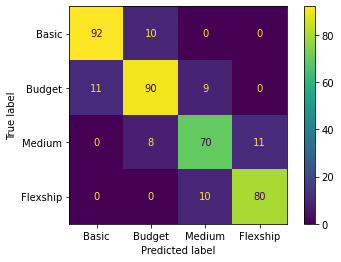

In [206]:
plot_confusion_matrix(dt_best ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

## Random Forest

In [207]:
# import Random Forest

from sklearn.ensemble import RandomForestClassifier

# create object of Random Forest

rf=RandomForestClassifier(random_state=1)

# fit the training data on Random Forest

rf.fit(x_train,y_train)

# predict on training data

y_train_pred=rf.predict(x_train)

# predict on test data

y_pred=rf.predict(x_test)

In [208]:
accuracy_score(y_train,y_train_pred)

1.0

In [209]:
accuracy_score(y_test,y_pred)

0.887468030690537

In [210]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       375
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       399

    accuracy                           1.00      1563
   macro avg       1.00      1.00      1.00      1563
weighted avg       1.00      1.00      1.00      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       102
           1       0.87      0.85      0.86       110
           2       0.86      0.79      0.82        89
           3       0.90      0.94      0.92        90

    accuracy                           0.89       391
   macro avg       0.89      0.89      0.89       391
weighted avg       0.89      0.89      0.89       391



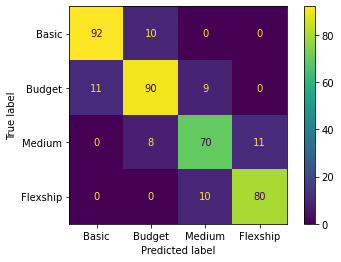

In [211]:
plot_confusion_matrix(dt_best ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])